In [1]:
# from importib import reload
%load_ext autoreload

In [2]:
import os
import sys
sys.path.append('..')

from scripts.data_utils.loaders import *
from scripts.data_utils.cleaning import *
from scripts.utils.visualizations import *

%autoreload 2

In [6]:
train_path = "../resources/data/train.csv"
test_path = "../resources/data/test.csv"
store_path = "../resources/data/store.csv"

train = load_csv(train_path)
test = load_csv(test_path)
store = load_csv(store_path)

train.shape, test.shape, store.shape

2025-01-15 05:43:43 - INFO - Loading data from file ...
2025-01-15 05:43:43 - INFO - Loading data from file ...
2025-01-15 05:43:43 - INFO - Loading data from file ...
2025-01-15 05:43:43 - INFO - Loading data from file ...
c:\Users\Darkles\10academy\10Academy-Kifiya-Week-4\notebooks\..\scripts\data_utils\loaders.py:22: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, sep=sep)
2025-01-15 05:43:46 - INFO - Loaded data from ../resources/data/train.csv, shape: (1017209, 9)
2025-01-15 05:43:46 - INFO - Loaded data from ../resources/data/train.csv, shape: (1017209, 9)
2025-01-15 05:43:46 - INFO - Loaded data from ../resources/data/train.csv, shape: (1017209, 9)
2025-01-15 05:43:46 - INFO - Loaded data from ../resources/data/train.csv, shape: (1017209, 9)
2025-01-15 05:43:46 - INFO - Loading data from file ...
2025-01-15 05:43:46 - INFO - Loading data from file ...
2025-01-15 05:43:46 - INFO - Loading data fro

((1017209, 9), (41088, 8), (1115, 10))

In [7]:
train = clean_data(train)
test = clean_data(test)
store = clean_data(store)
train.shape, test.shape, store.shape

((1017209, 9), (41088, 7), (1115, 10))

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Store          41088 non-null  int64         
 1   DayOfWeek      41088 non-null  int64         
 2   Date           41088 non-null  datetime64[ns]
 3   Open           41077 non-null  float64       
 4   Promo          41088 non-null  int64         
 5   StateHoliday   41088 non-null  object        
 6   SchoolHoliday  41088 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 2.2+ MB


In [10]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [11]:
train.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [12]:
store.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [4]:
# Handle missing values
missing_strategies = {
    "CompetitionDistance": "median",
    "StateHoliday": "None",
    "PromoInterval": "None"
}

train_cleaned = train.copy()
store_cleaned = store.copy()

store_cleaned = handle_missing_values(store_cleaned, missing_strategies)
store_cleaned

AttributeError: 'NoneType' object has no attribute 'copy'

In [14]:
# Detect and review outliers
outlier_columns = ["Sales", "Customers", "CompetitionDistance"]
outliers = detect_outliers(train_cleaned, outlier_columns)

for col, outlier_data in outliers.items():
    print(f"Outliers in {col}: {len(outlier_data)} rows")

2025-01-06 04:10:54 - INFO - Detected 26694 outliers in Sales.
2025-01-06 04:10:54 - INFO - Detected 26694 outliers in Sales.
2025-01-06 04:10:54 - INFO - Detected 26694 outliers in Sales.
2025-01-06 04:10:54 - INFO - Detected 26694 outliers in Sales.
2025-01-06 04:10:54 - INFO - Detected 38095 outliers in Customers.
2025-01-06 04:10:54 - INFO - Detected 38095 outliers in Customers.
2025-01-06 04:10:54 - INFO - Detected 38095 outliers in Customers.
2025-01-06 04:10:54 - INFO - Detected 38095 outliers in Customers.
2025-01-06 04:10:54 - WARNING - Column CompetitionDistance not found in DataFrame.
2025-01-06 04:10:54 - WARNING - Column CompetitionDistance not found in DataFrame.
2025-01-06 04:10:54 - WARNING - Column CompetitionDistance not found in DataFrame.
2025-01-06 04:10:54 - WARNING - Column CompetitionDistance not found in DataFrame.


Outliers in Sales: 26694 rows
Outliers in Customers: 38095 rows


In [15]:
# Sales outliers detected
len(outliers['Sales'])

26694

In [16]:
# Remove unnecessary columns
irrelevant_columns = ["Id"]
test_cleaned = remove_irrelevant_columns(test, irrelevant_columns)
train.shape, train_cleaned.shape, store.shape, store_cleaned.shape

2025-01-06 04:10:54 - INFO - Dropped columns: ['Id']
2025-01-06 04:10:54 - INFO - Dropped columns: ['Id']
2025-01-06 04:10:54 - INFO - Dropped columns: ['Id']
2025-01-06 04:10:54 - INFO - Dropped columns: ['Id']


((1017209, 9), (1017209, 9), (1115, 10), (1115, 10))

In [17]:
train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [18]:
store_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [19]:
test_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Store          41088 non-null  int64         
 1   DayOfWeek      41088 non-null  int64         
 2   Date           41088 non-null  datetime64[ns]
 3   Open           41077 non-null  float64       
 4   Promo          41088 non-null  int64         
 5   StateHoliday   41088 non-null  object        
 6   SchoolHoliday  41088 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 2.2+ MB


Visualize after cleaning

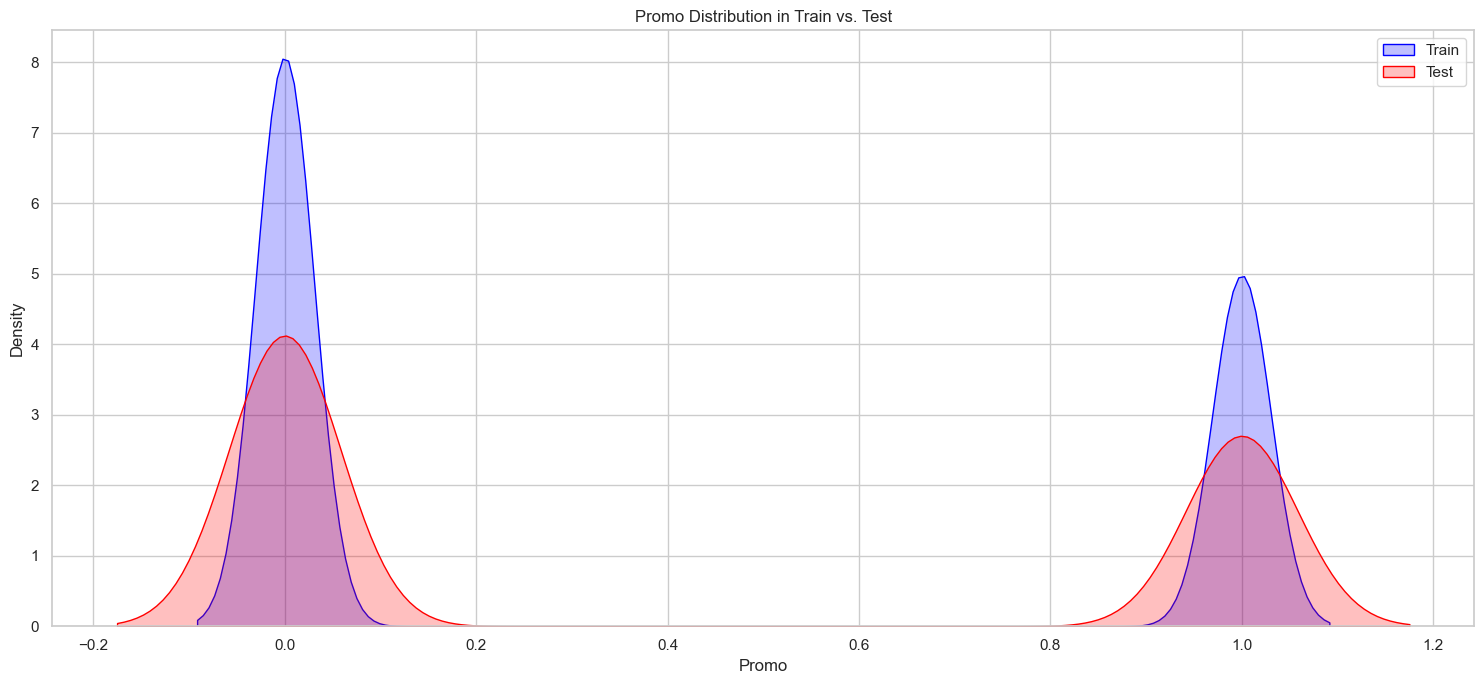

In [20]:
# Visualizing Promo distribution comparison
plot_distribution_comparision_datasets(train_cleaned, test_cleaned, column='Promo', kind='numerical', title="Promo Distribution in Train vs. Test")

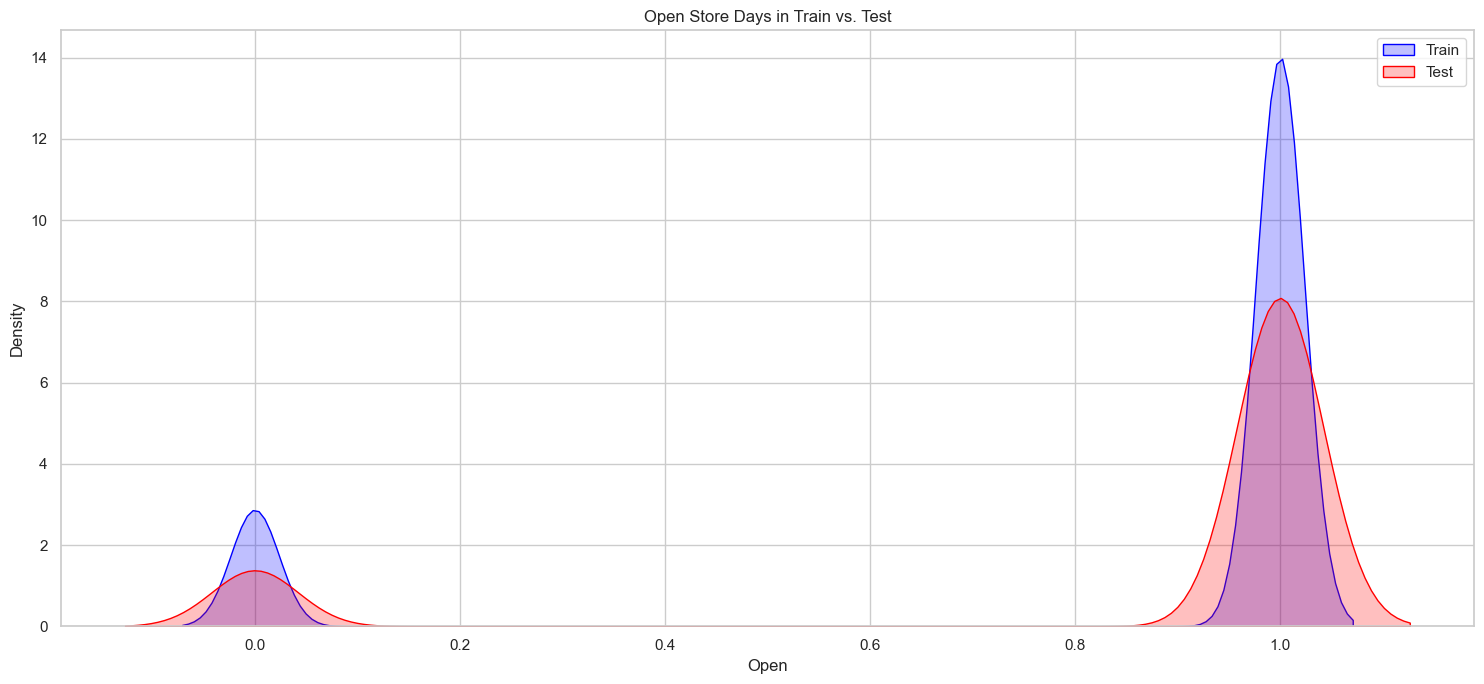

In [21]:
# Visualizing Open store days comparison
plot_distribution_comparision_datasets(train_cleaned, test_cleaned, column='Open', kind='numerical', title="Open Store Days in Train vs. Test")

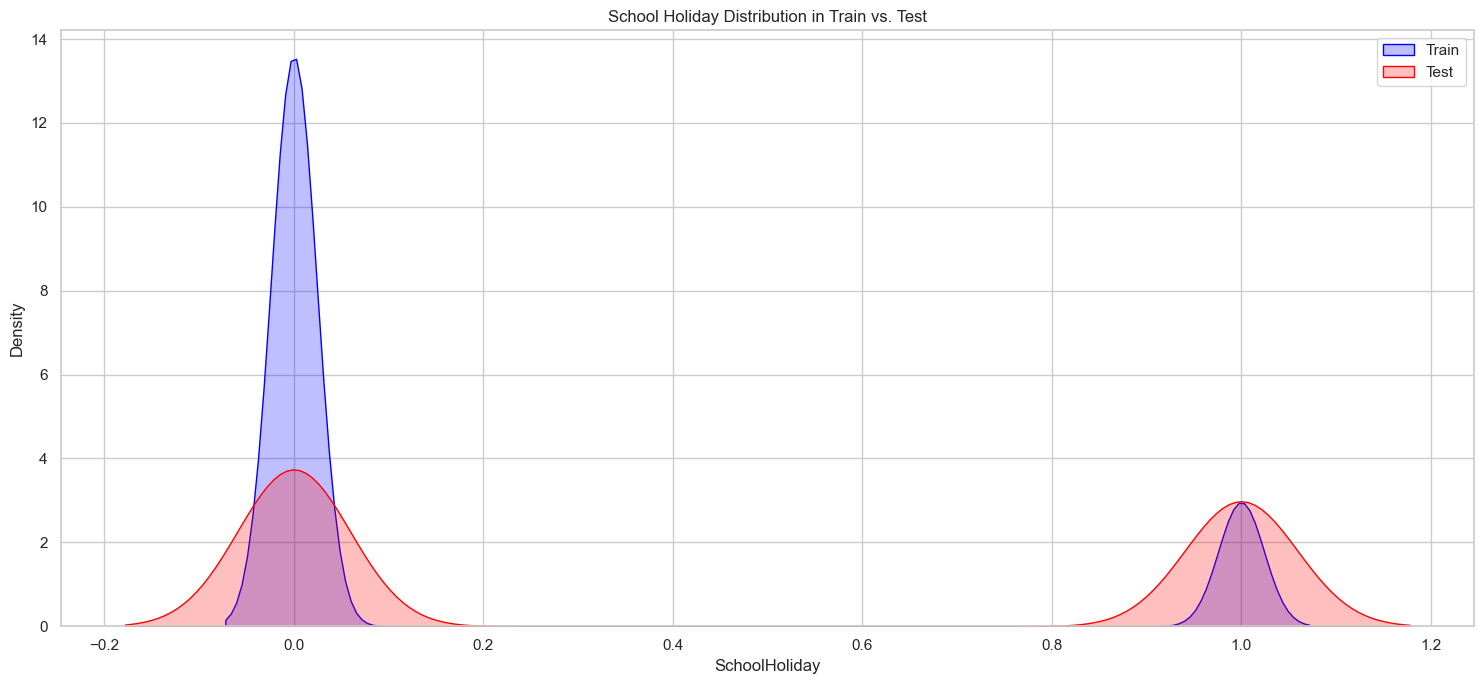

In [22]:
# Comparing School Holidays
plot_distribution_comparision_datasets(train_cleaned, test_cleaned, column='SchoolHoliday', kind='numerical', title="School Holiday Distribution in Train vs. Test")

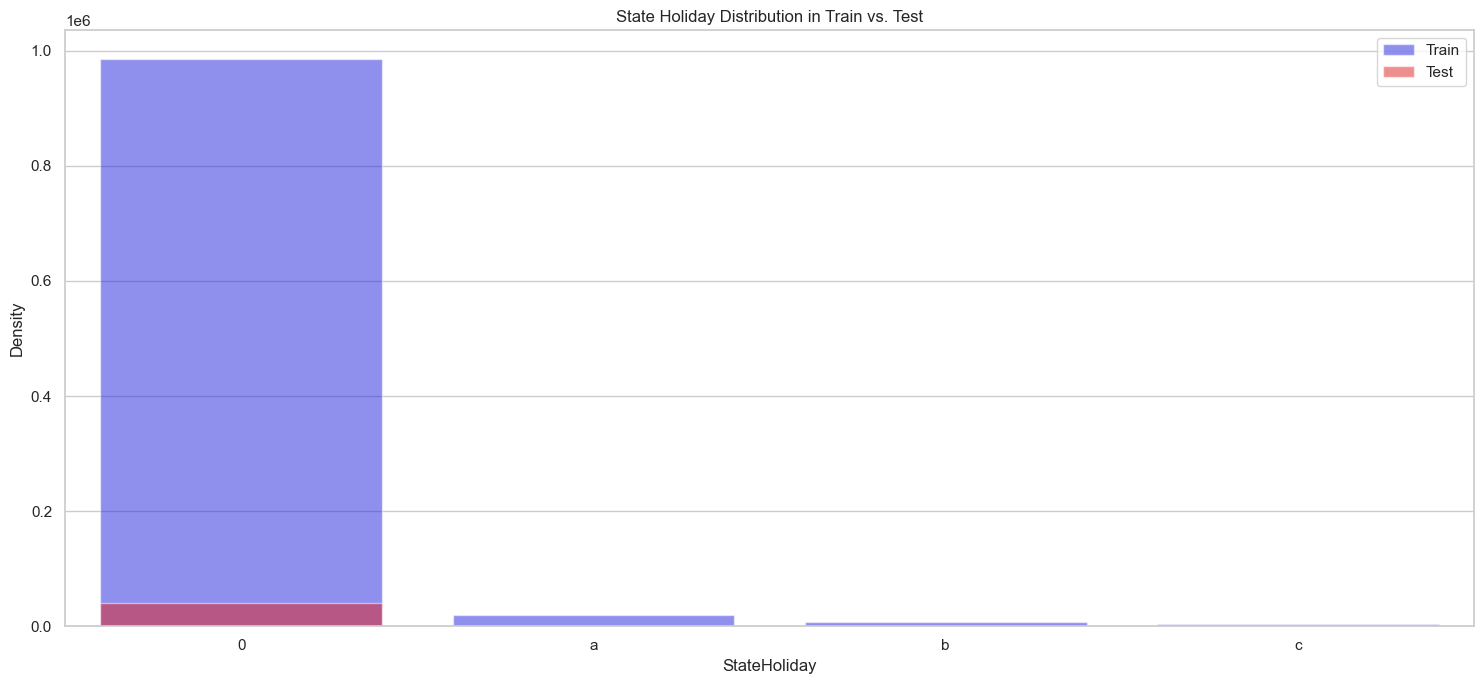

In [23]:
# Comparing State Holidays
plot_distribution_comparision_datasets(train_cleaned, test_cleaned, "StateHoliday", kind="categorical", title="State Holiday Distribution in Train vs. Test")

Merge datasets

In [24]:
# Merge train and store datasets
merged_data = train_cleaned.merge(store_cleaned, on="Store", how='left')
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

Distribution and Comparison

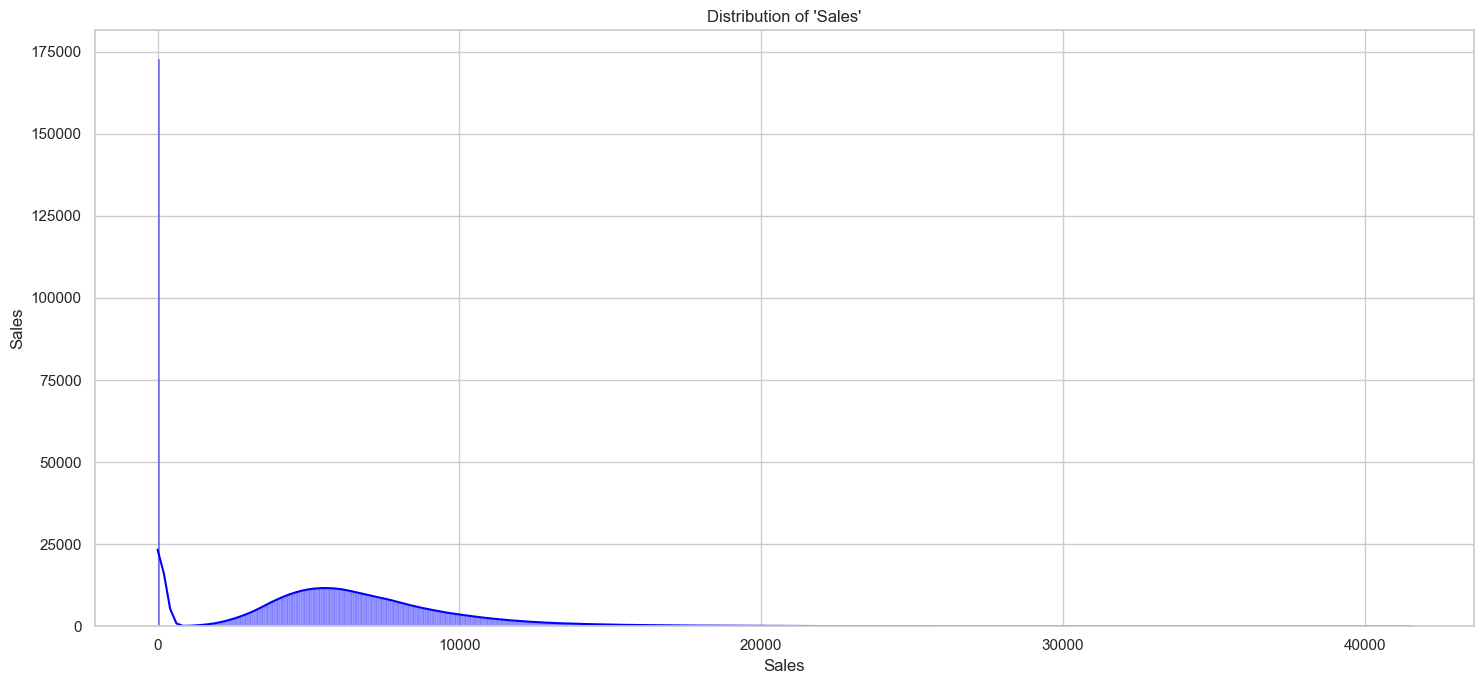

In [25]:
plot_distribution_comparison_dataset(data=merged_data, column='Sales')

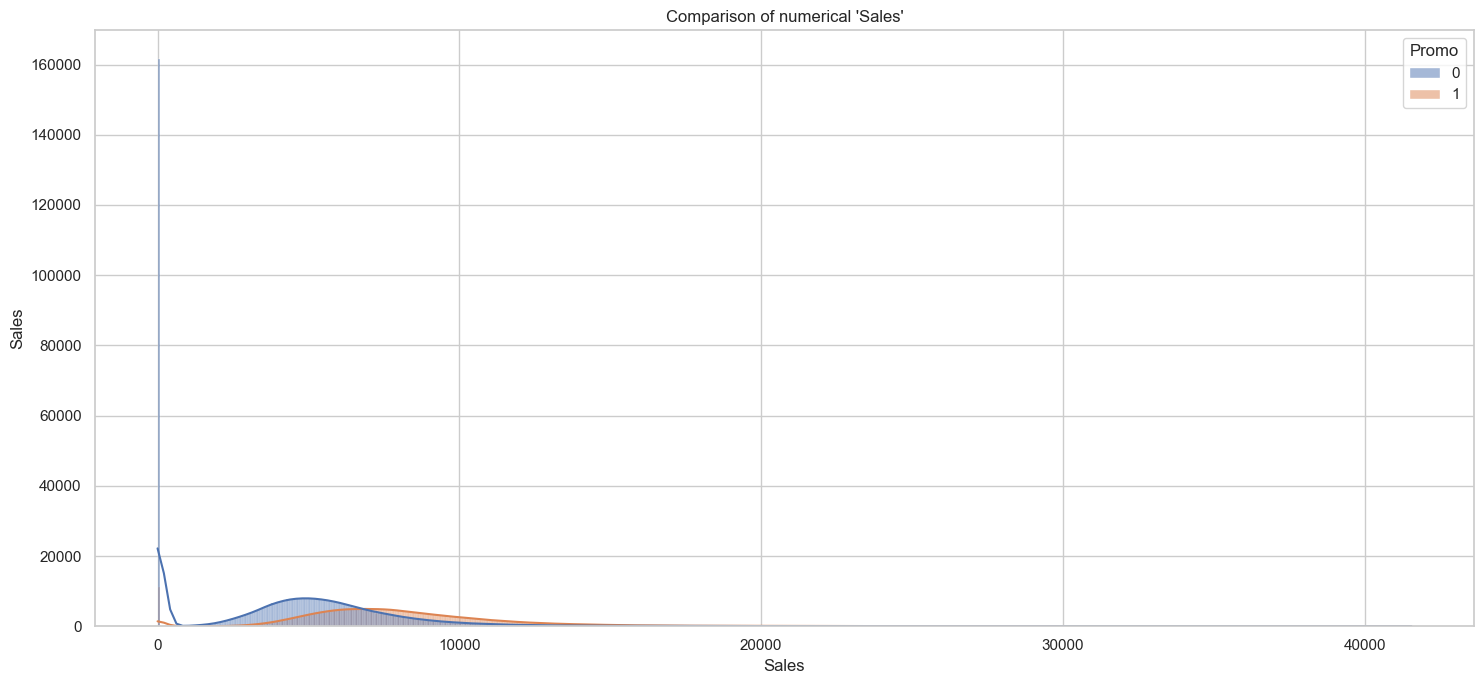

In [26]:
plot_distribution_comparison_dataset(data=merged_data, column='Sales', compare_column='Promo', kind='numerical')

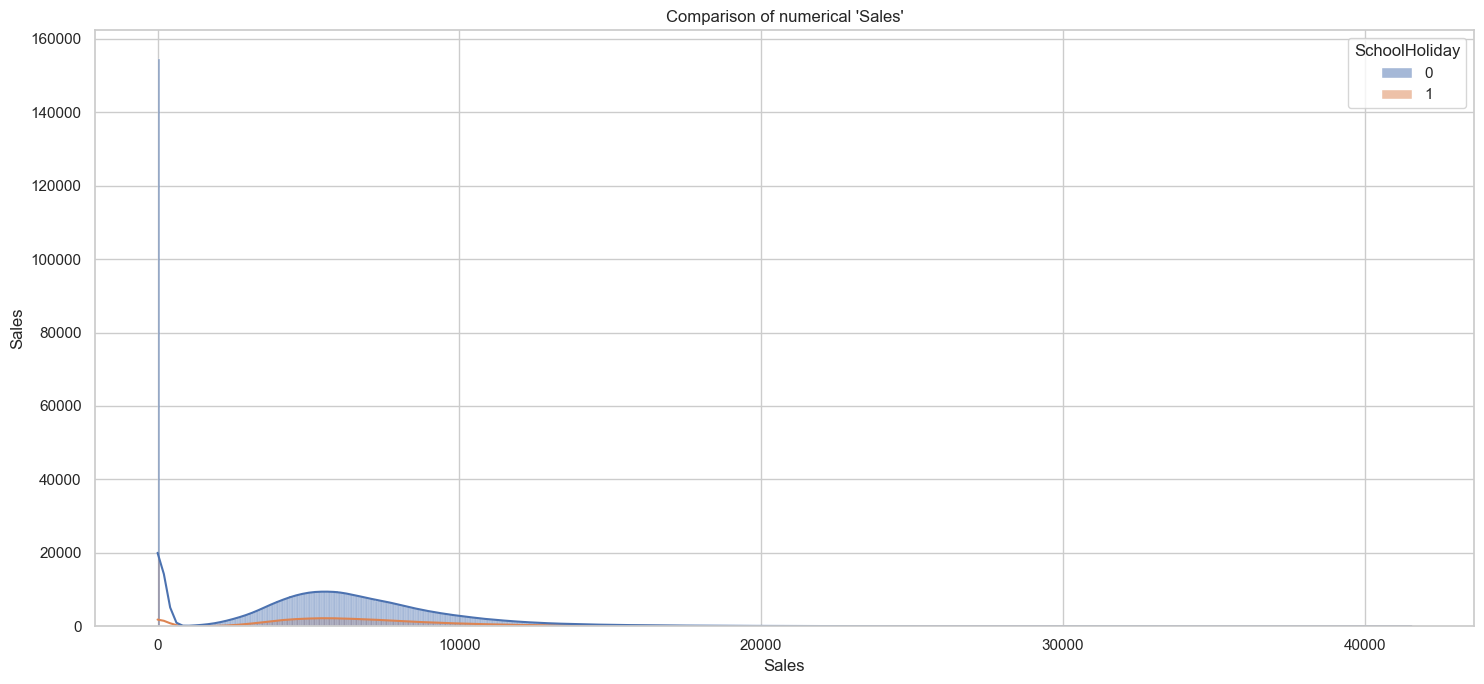

In [27]:
plot_distribution_comparison_dataset(data=merged_data, column='Sales', compare_column='SchoolHoliday', kind='numerical')

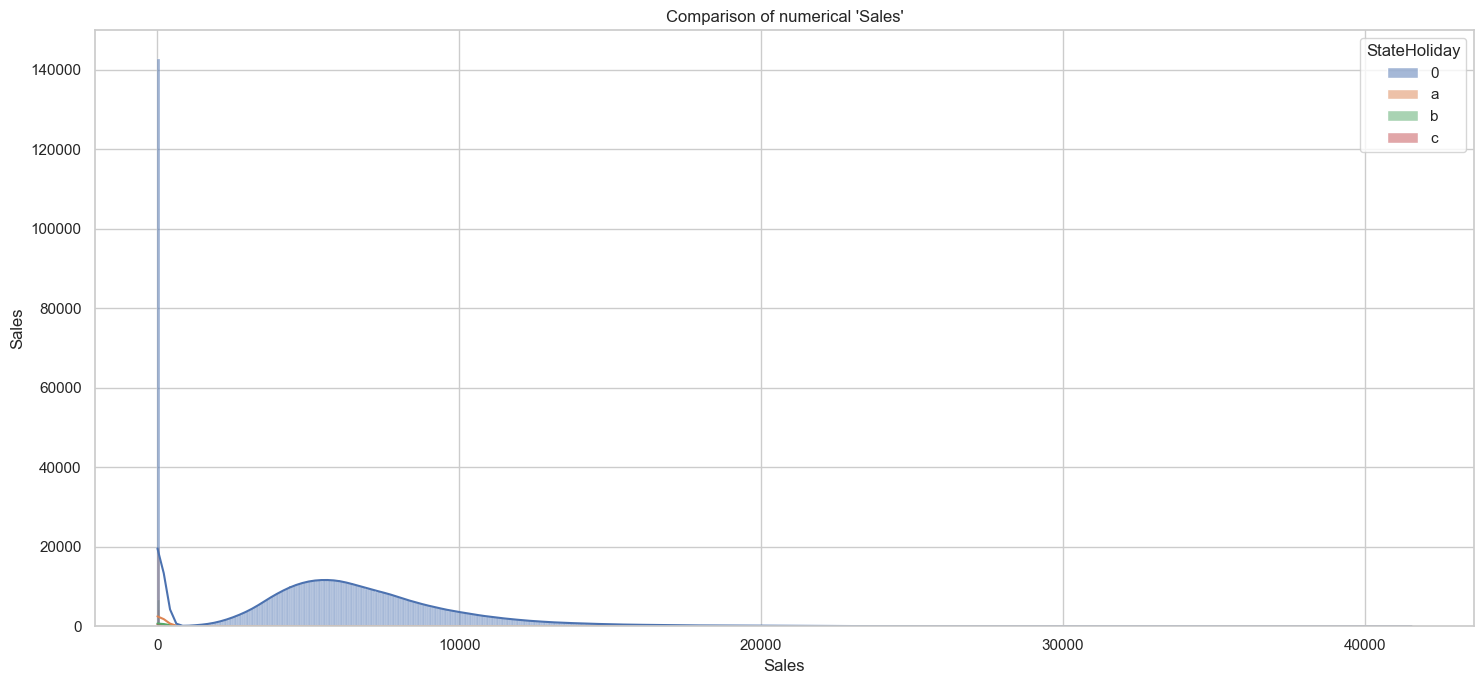

In [28]:
plot_distribution_comparison_dataset(data=merged_data, column='Sales', compare_column='StateHoliday', kind='numerical')

Correlation and Trends

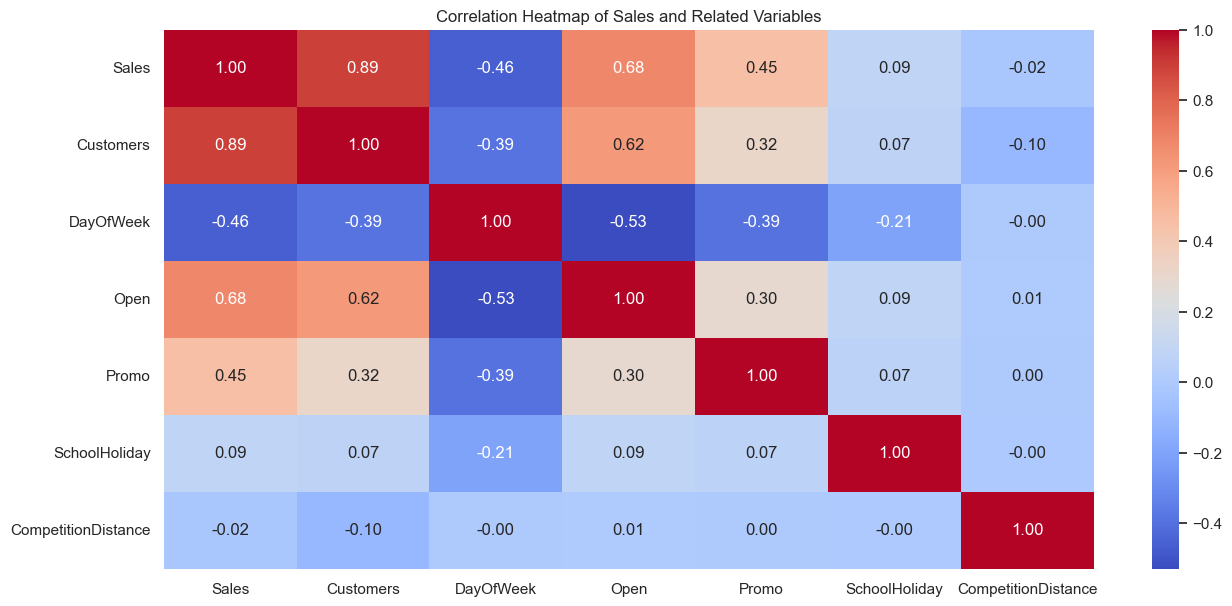

In [29]:
# Correlation Heatmap for continuous variables
columns = ['Sales', 'Customers', 'DayOfWeek', 'Open', 'Promo', 'SchoolHoliday', 'CompetitionDistance']
plot_sales_correlations(data=merged_data, columns=columns, title="Correlation Heatmap of Sales and Related Variables")

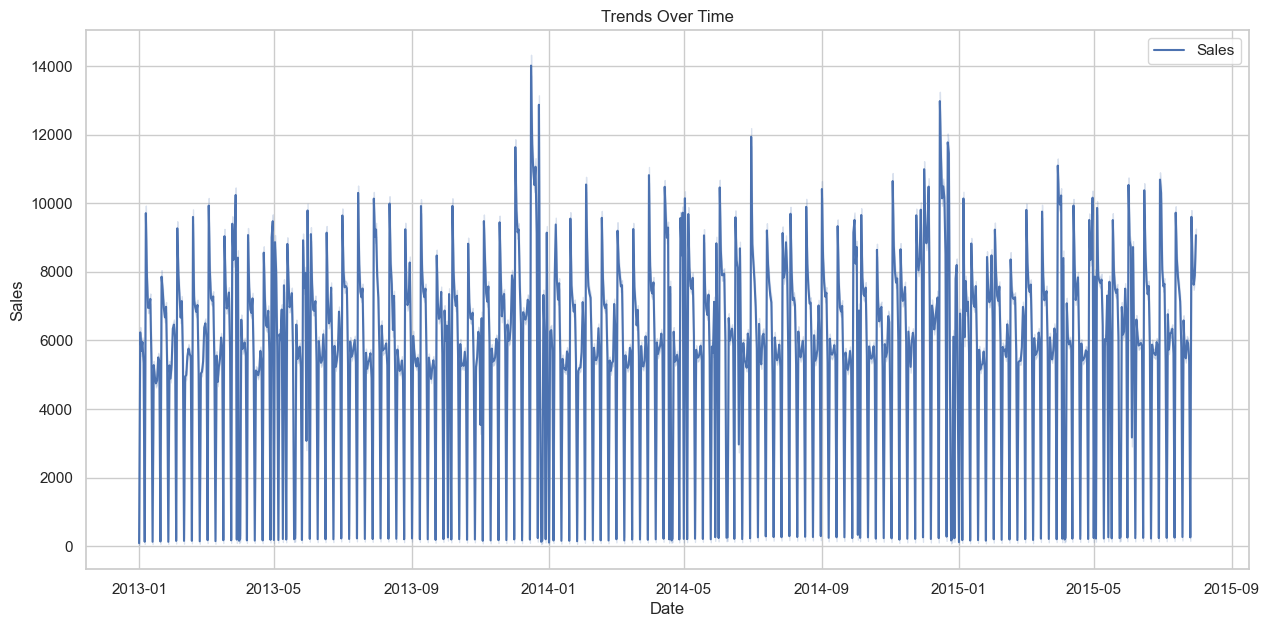

In [30]:
plot_sales_correlations(data=merged_data, columns=['Date', 'Sales'], trends=True)

In [ ]:
plot_correlation_analysis(merged_data)

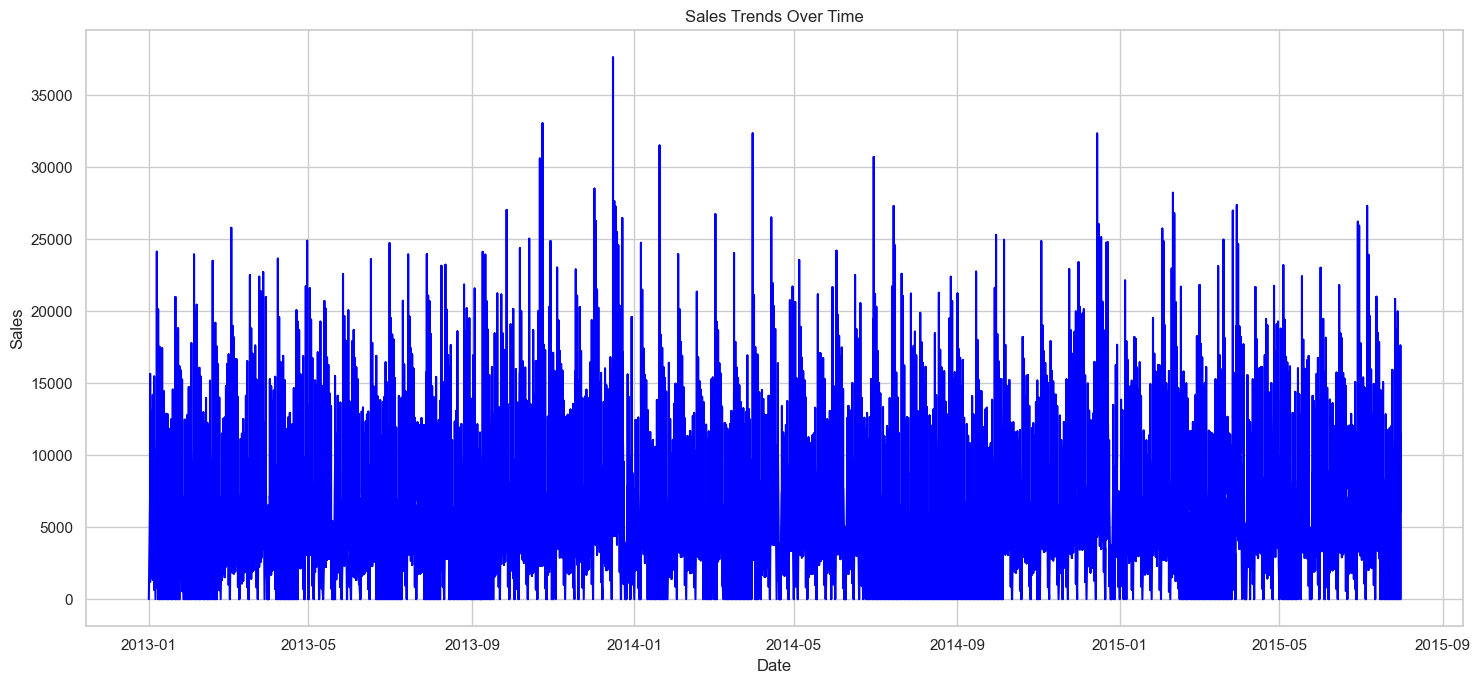

In [31]:
plot_sales_trends(merged_data, "Sales")

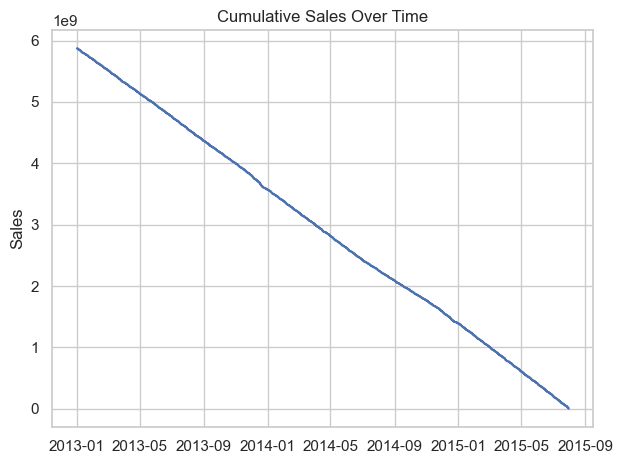

In [32]:
plot_sales_analysis(data=merged_data, analysis_type='cumulative')

In [ ]:
plot_cumulative_sales(merged_data)

c:\Users\Darkles\10academy\10Academy-Kifiya-Week-4\notebooks\..\scripts\utils\visualizations.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, y='Sales', palette="Set2")


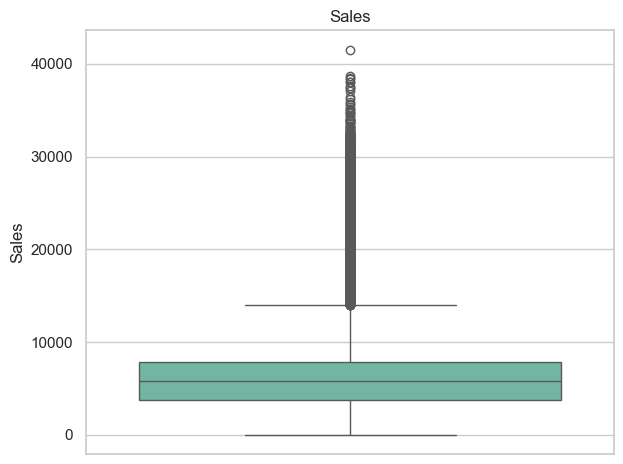

In [33]:
# Boxplot of Sales
plot_sales_analysis(merged_data, analysis_type='Normal')

2025-01-06 04:13:54 - WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
2025-01-06 04:13:54 - WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
2025-01-06 04:13:54 - WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
2025-01-06 04:13:54 - WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


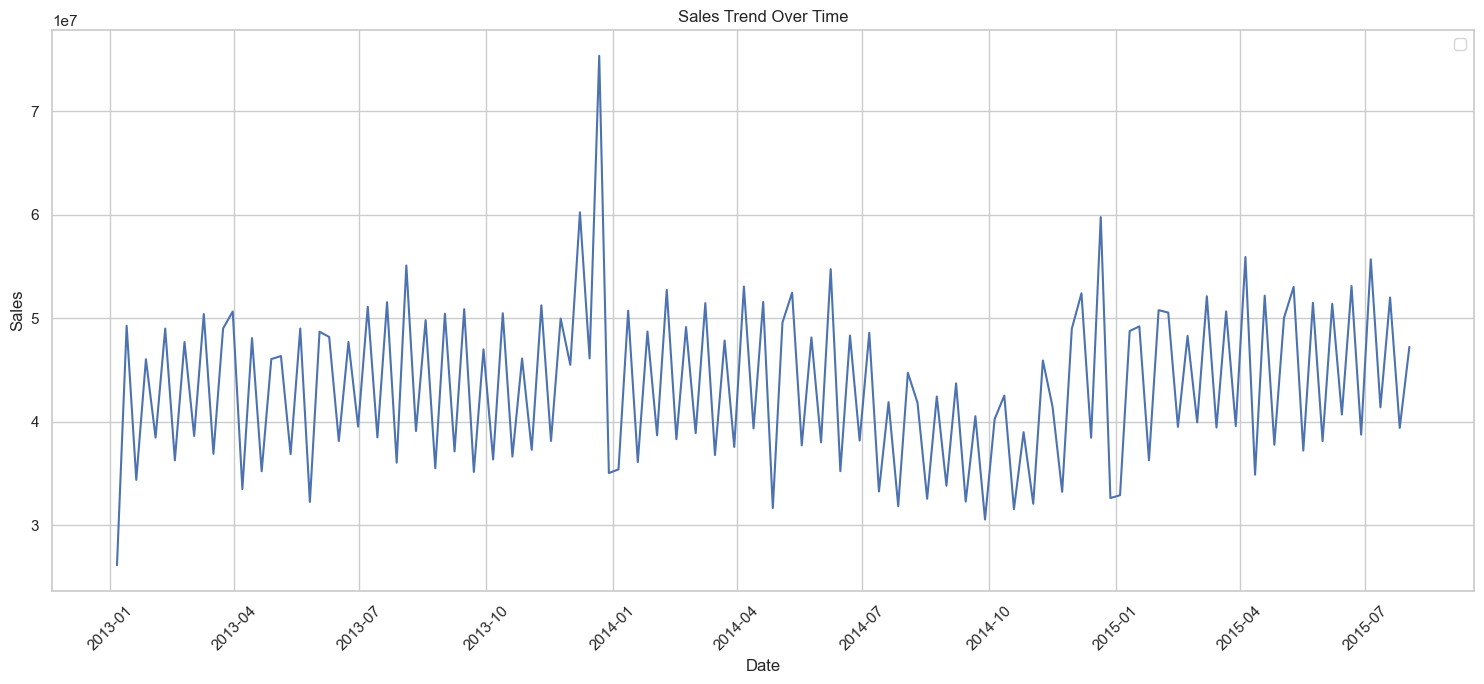

In [34]:
# Weekly Sales Plot
plot_sales(merged_data.set_index('Date'), 'Sales', freq='W')

c:\Users\Darkles\10academy\10Academy-Kifiya-Week-4\notebooks\..\scripts\utils\visualizations.py:227: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = data.dropna().sort_values(by="Date")
2025-01-06 04:13:55 - WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
2025-01-06 04:13:55 - WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
2025-01-06 04:13:55 - WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
2025-01-06 04:13:55 - WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument

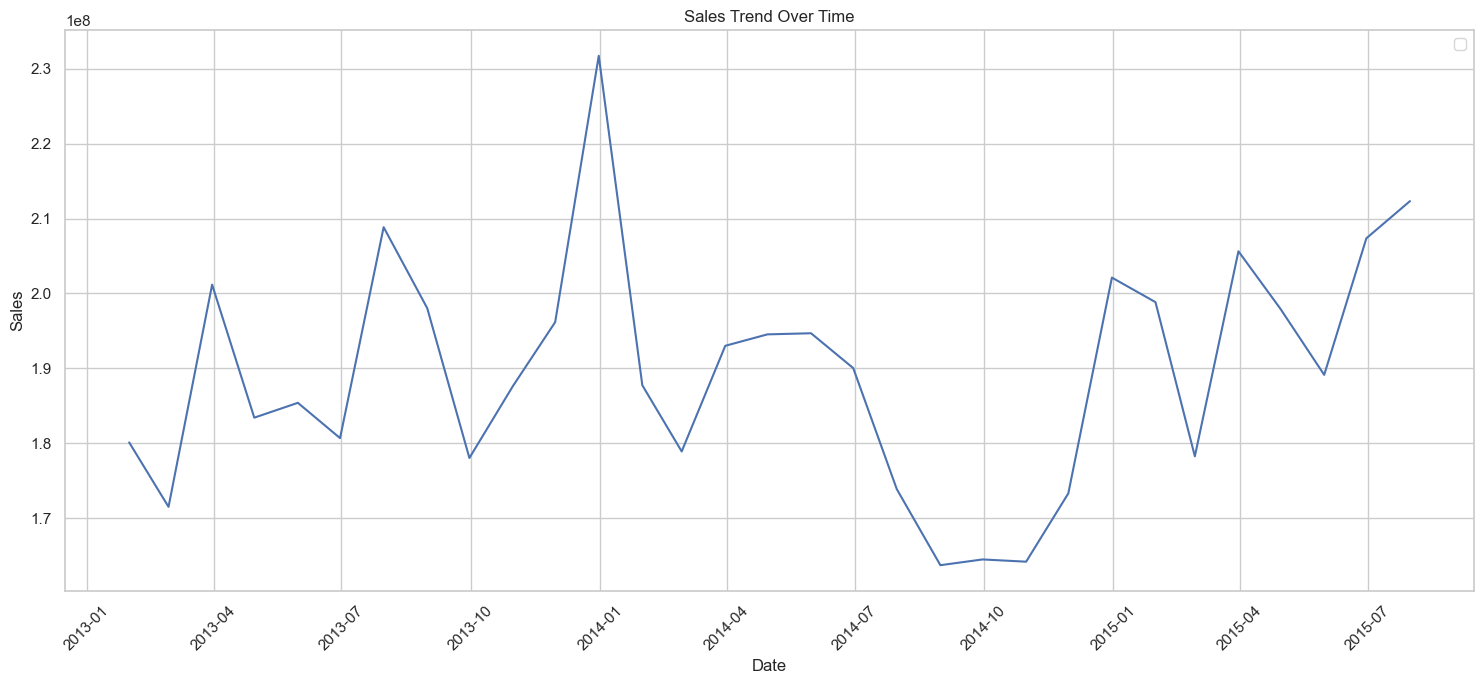

In [35]:
# Monthly Sales Plot
plot_sales(merged_data.set_index('Date'), 'Sales', freq='M')

In [36]:
# # Seasonal Decomposition
# seasonal_decomposition(train_cleaned.set_index('Date'), 'Sales', 't', 'g', 't')
# seasonal_decomposition_2(train_cleaned.set_index('Date'), 'Sales', 't', 'g', 't')

Sales Trends

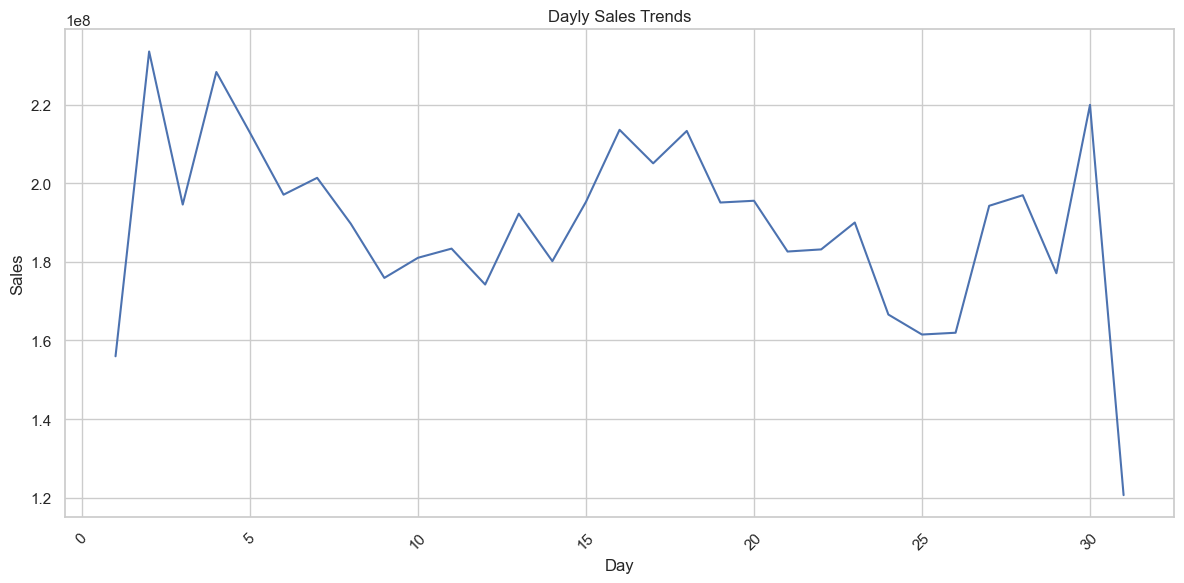

In [37]:
plot_sales_various_trends(merged_data, sales_column='Sales', freq='Day')

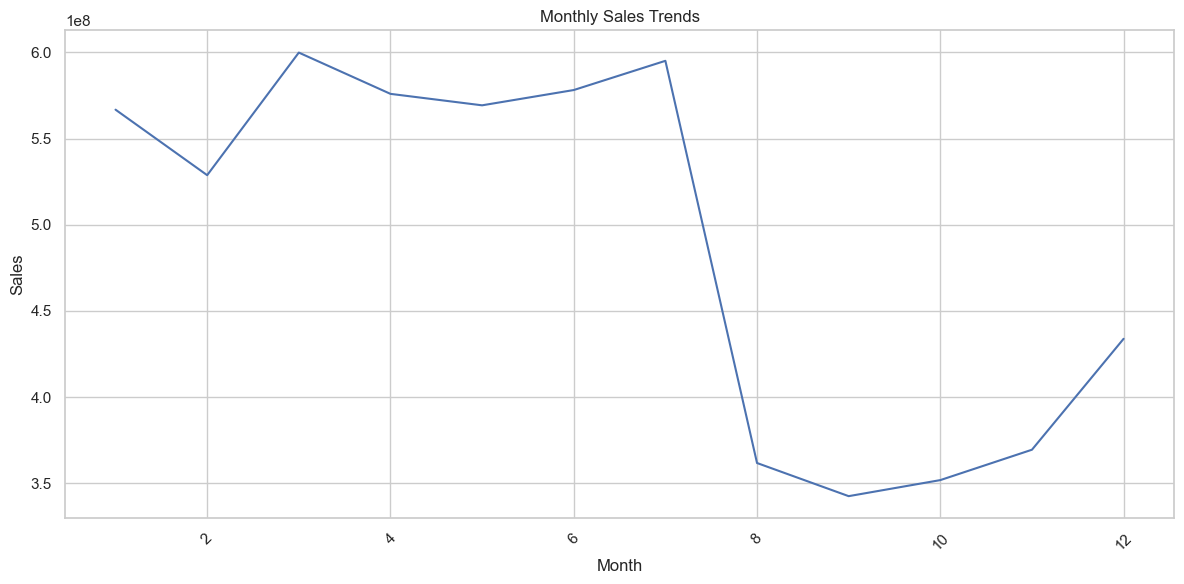

In [38]:
plot_sales_various_trends(merged_data, sales_column='Sales', freq='Month')

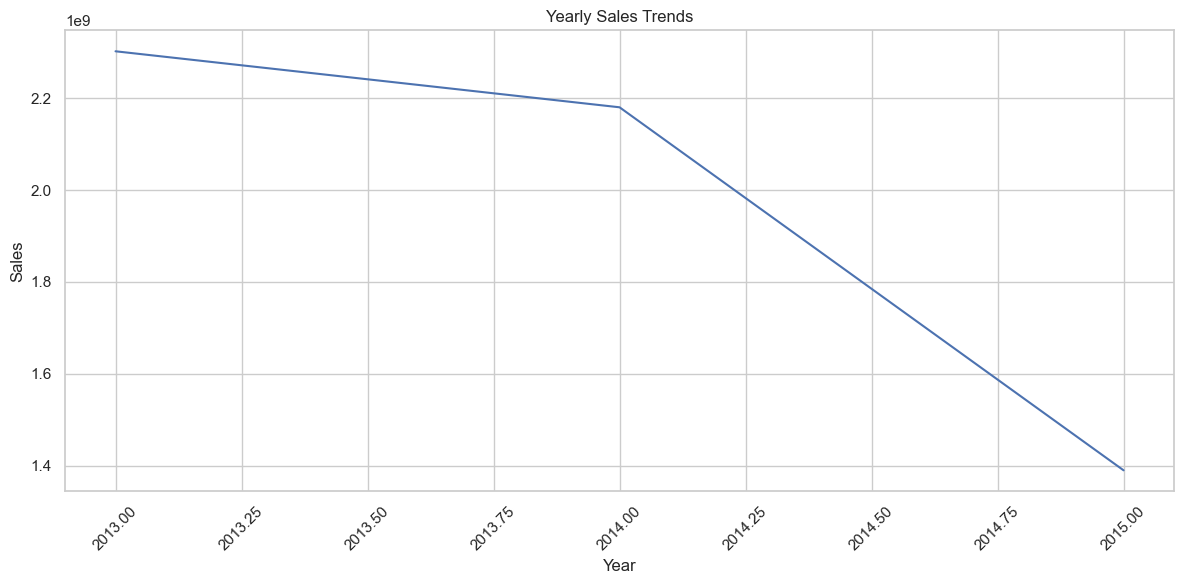

In [39]:
plot_sales_various_trends(merged_data, sales_column='Sales', freq='Year')

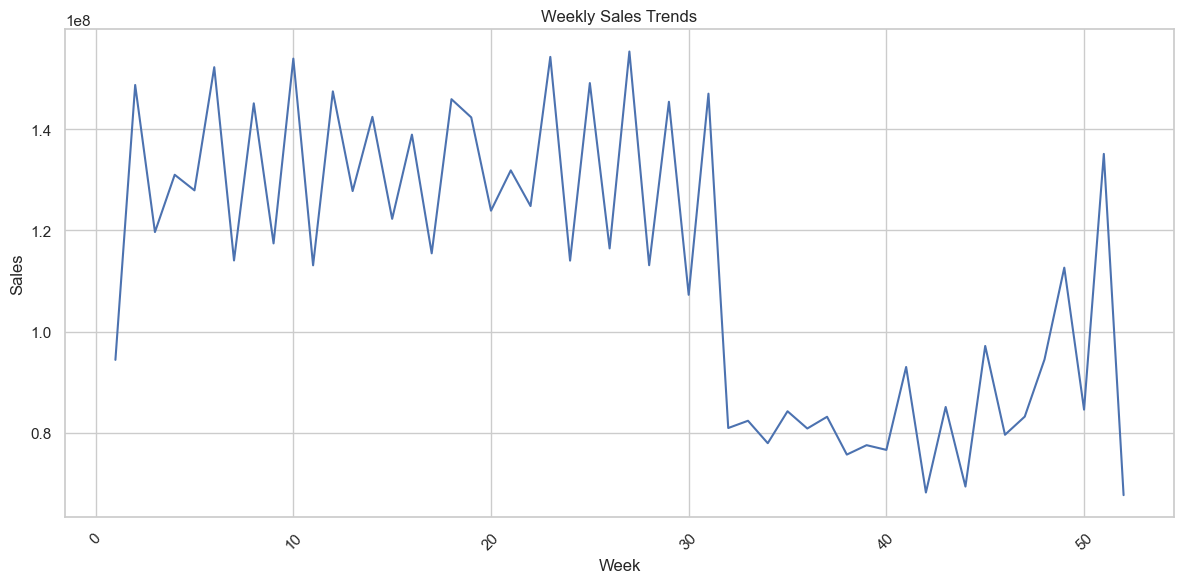

In [40]:
plot_sales_various_trends(merged_data, sales_column='Sales', freq='Week')

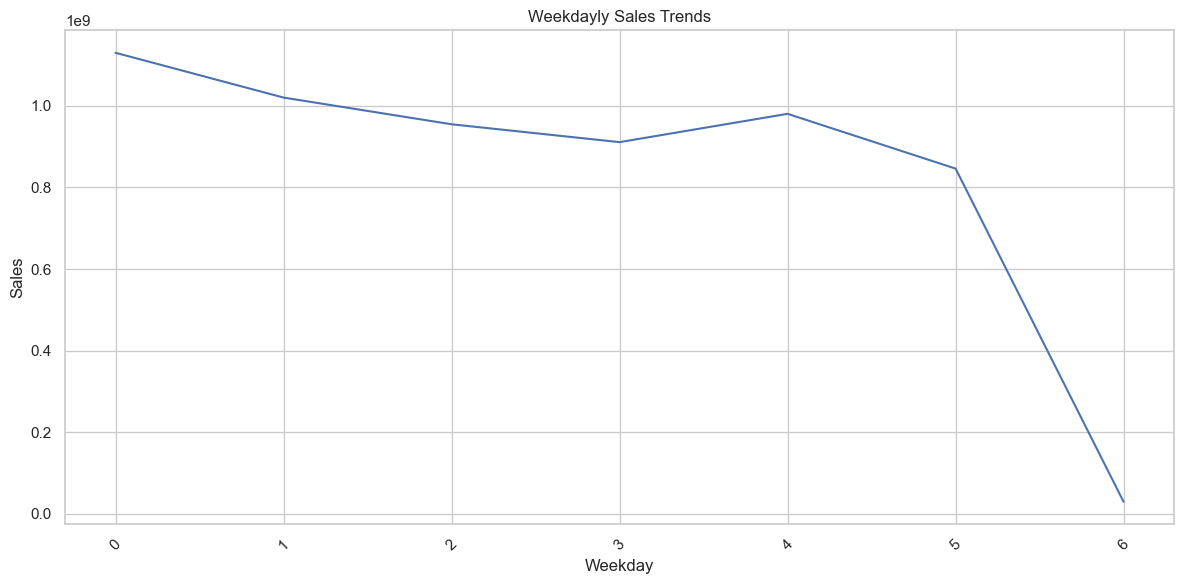

In [41]:
plot_sales_various_trends(merged_data, sales_column='Sales', freq='Weekday')

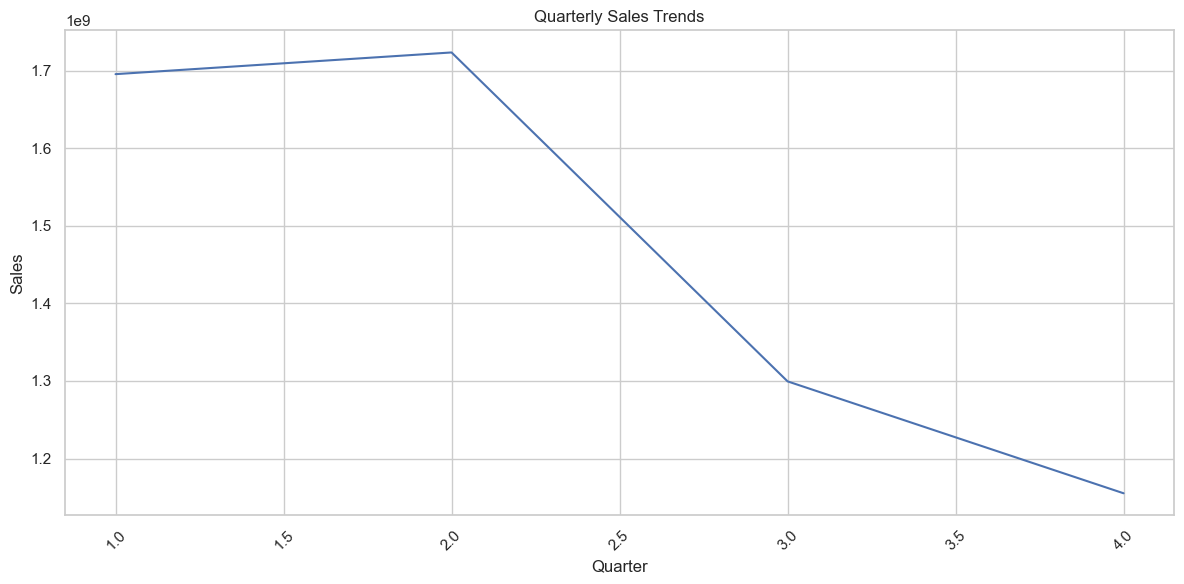

In [42]:
plot_sales_various_trends(merged_data, sales_column='Sales', freq='Quarter')

Sales Analysis

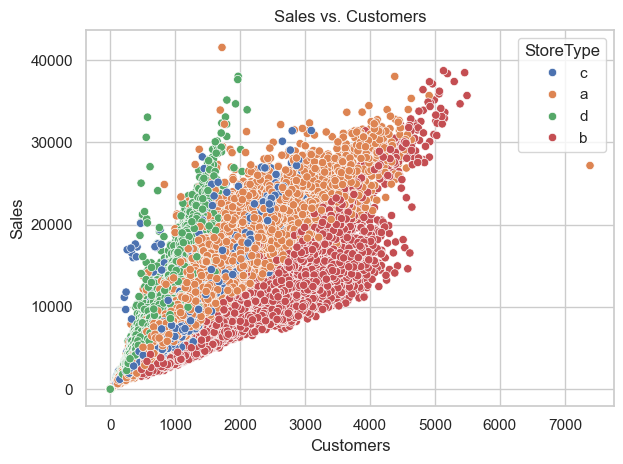

In [43]:
plot_sales_analysis(data=merged_data, analysis_type='sales_vs_customers')

In [ ]:
plot_sales_vs_customers(merged_data)

In [ ]:

plot_sales_growth_rate(merged_data)

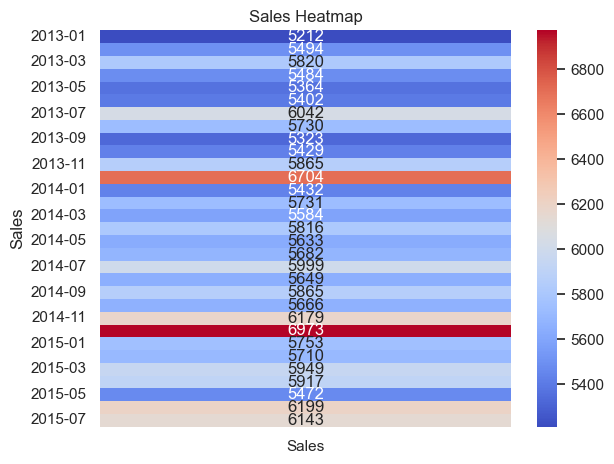

In [44]:
plot_sales_analysis(data=merged_data, analysis_type='heatmap', freq='M')

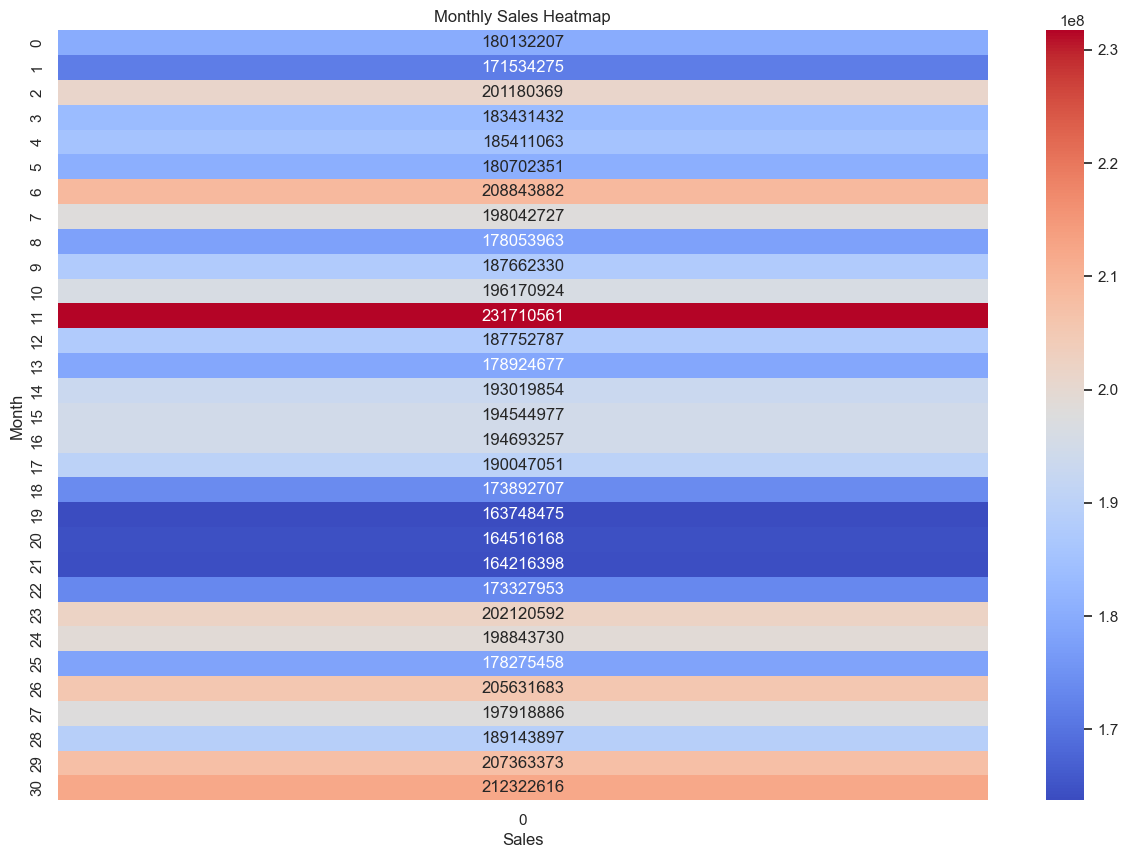

In [45]:
# Heatmap of Sales variation in days of the month
plot_sales_heatmap(merged_data)

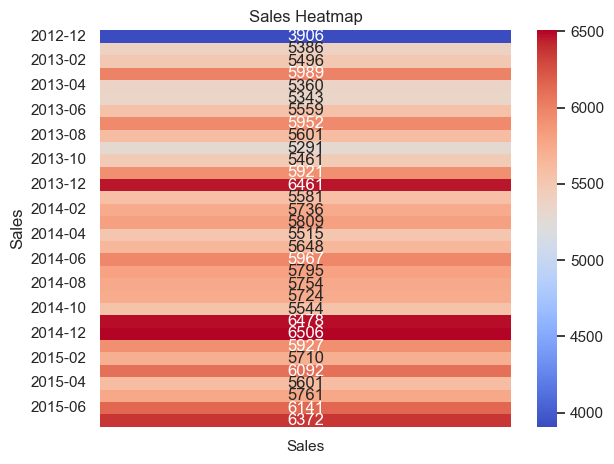

In [46]:
plot_sales_analysis(data=merged_data, analysis_type='heatmap', freq='W')

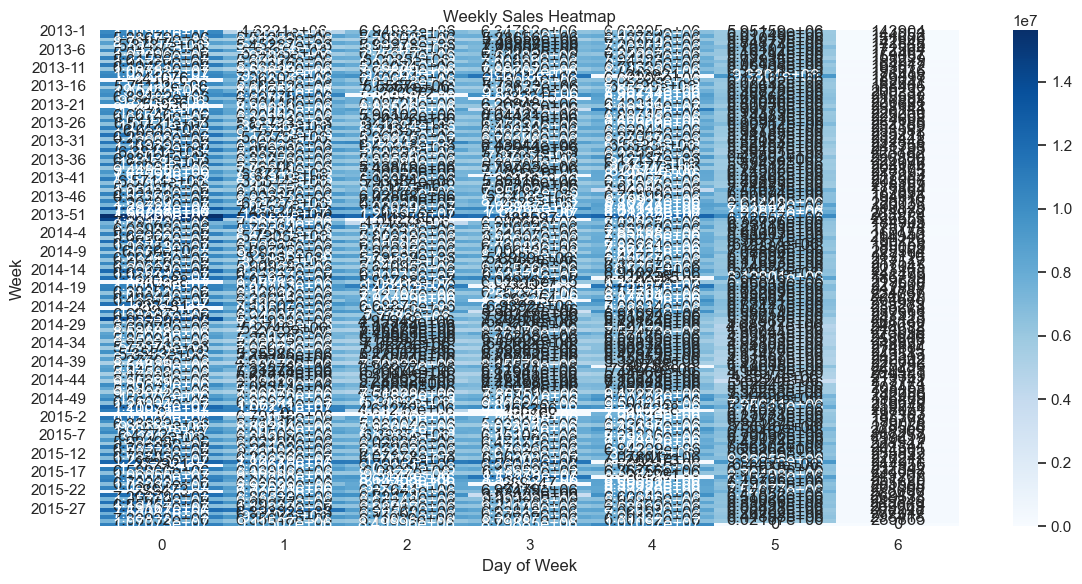

In [47]:
plot_weekly_sales_heatmap(merged_data, date_column='Date', sales_column='Sales')

2025-01-06 04:15:05 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-06 04:15:05 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-06 04:15:05 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-06 04:15:05 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-06 04:15:06 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If 

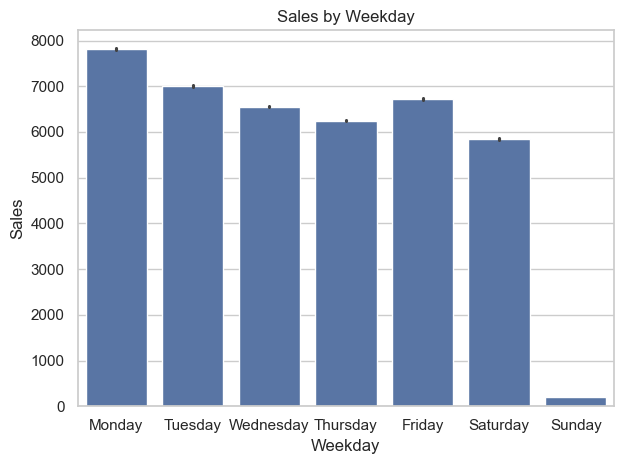

In [48]:
plot_sales_analysis(data=merged_data, analysis_type='weekday')

2025-01-06 04:15:50 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-06 04:15:50 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-06 04:15:50 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-06 04:15:50 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-06 04:15:51 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If 

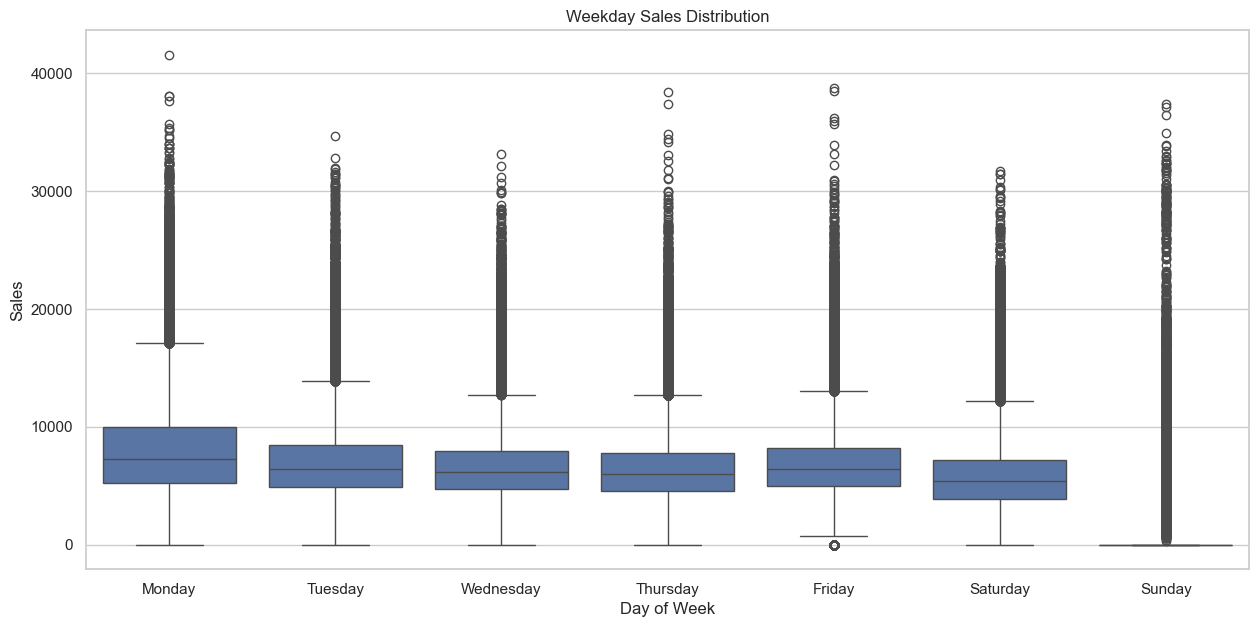

In [49]:
# Weekday Sales Distribution
plot_weekday_sales(merged_data)

In [ ]:
plot_sales_month_week_heatmap(merged_data)

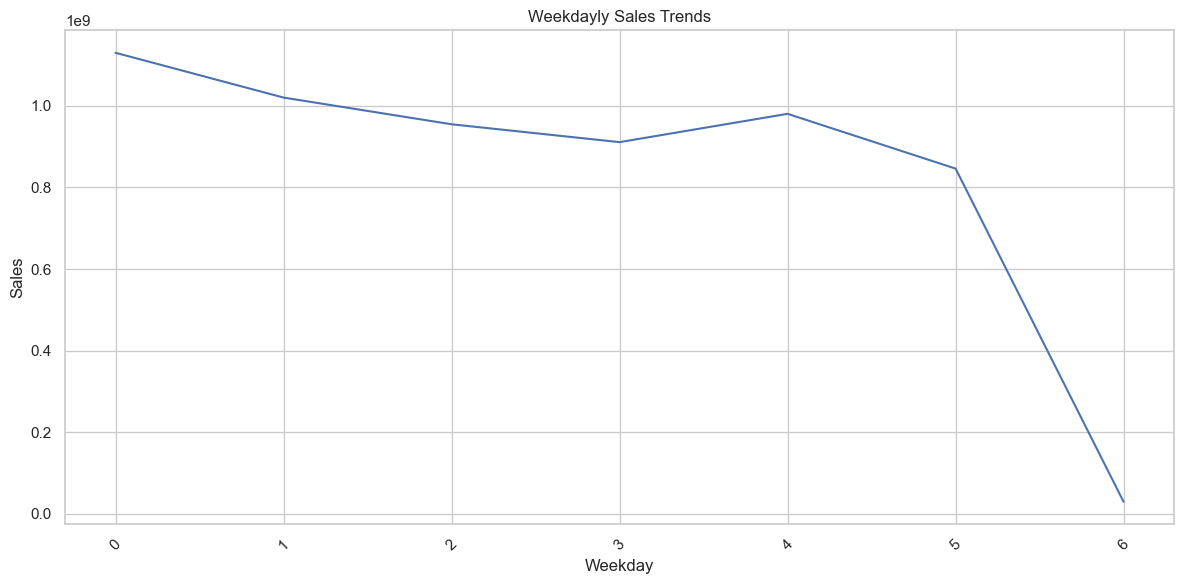

In [50]:
plot_sales_various_trends(merged_data, sales_column='Sales', freq='Weekday')

c:\Users\Darkles\10academy\10Academy-Kifiya-Week-4\notebooks\..\scripts\utils\visualizations.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='StoreType', y='Sales', palette="Set2")


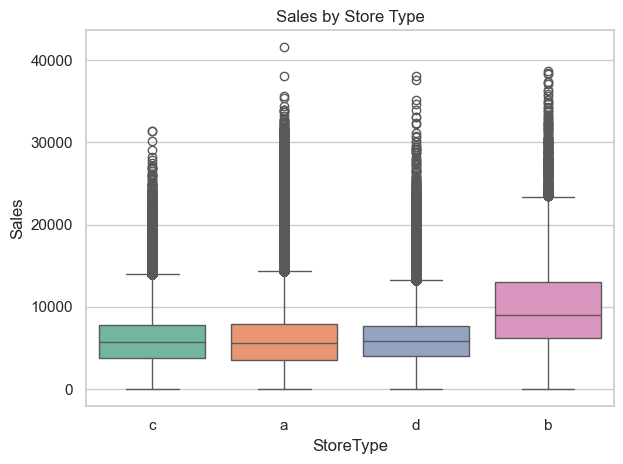

In [51]:
plot_sales_analysis(data=merged_data, analysis_type='by_store_type')

In [ ]:
plot_store_type_performance(merged_data)

c:\Users\Darkles\10academy\10Academy-Kifiya-Week-4\notebooks\..\scripts\utils\visualizations.py:293: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  aggregated_sales = data[column_name].resample(freq).sum()


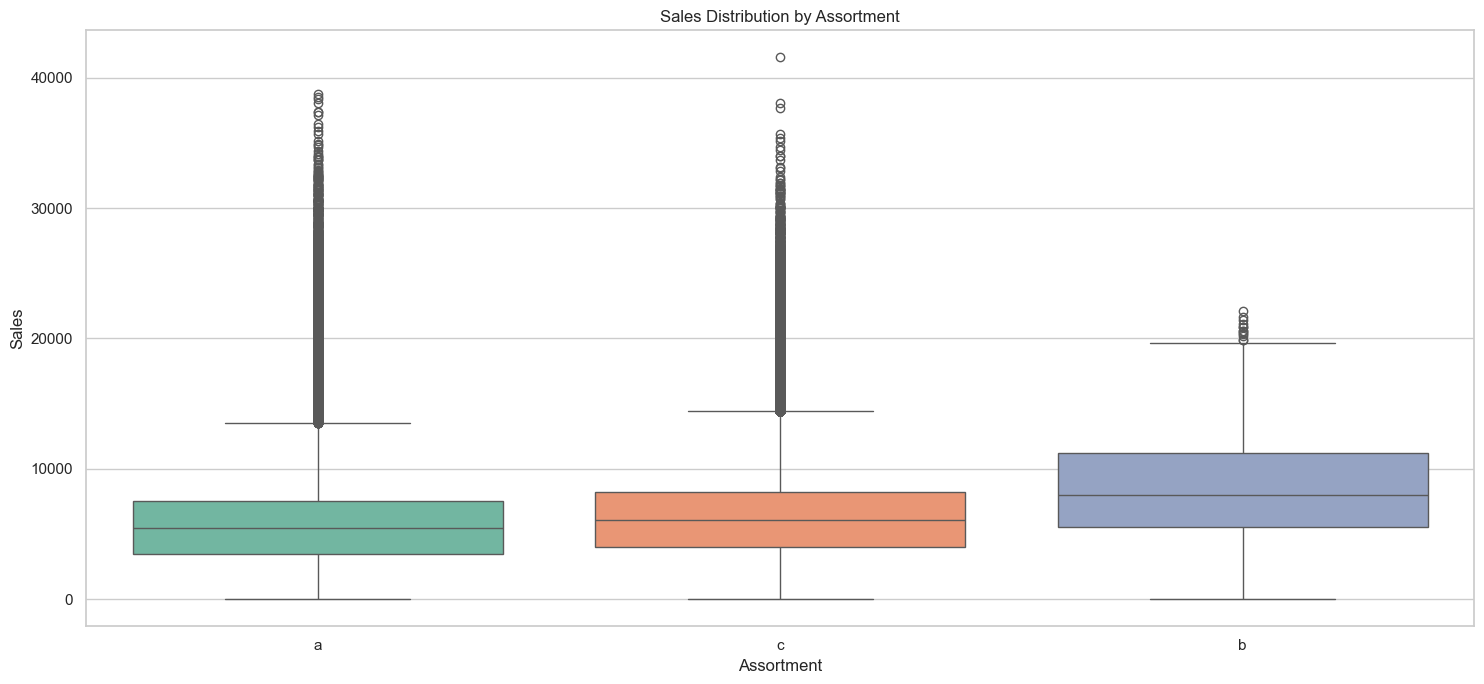

In [52]:
# Assortment Analysis
plot_sales_during_holidays(merged_data, "Assortment", "Sales")

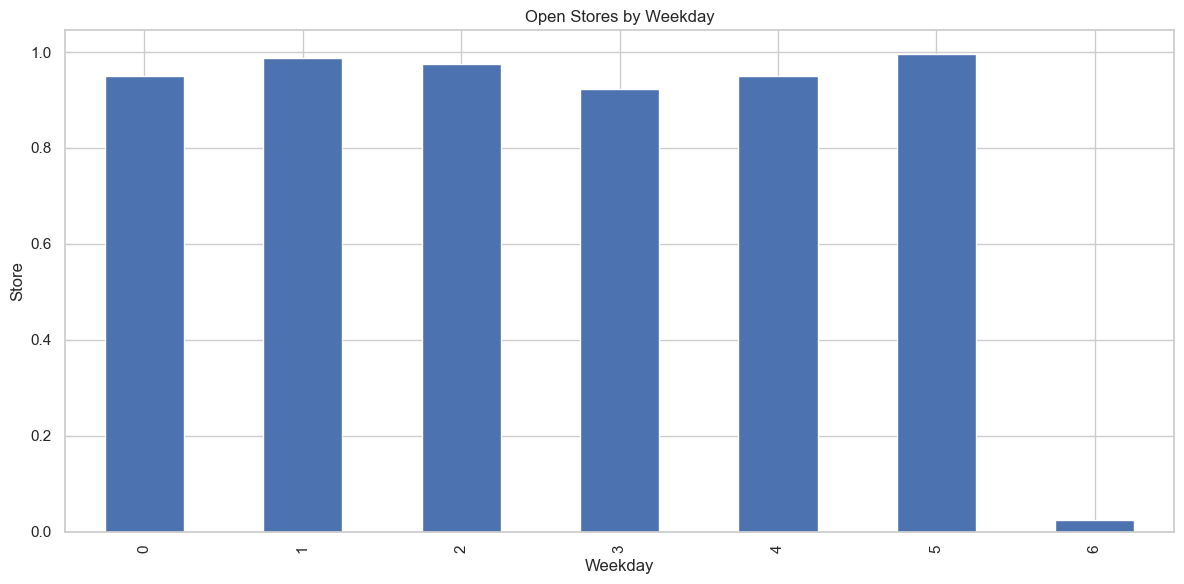

In [53]:
plot_sales_comparison(merged_data, status_column='Open', category_column='Weekday', title='Open Stores by Weekday', xlabel='Weekday', ylabel='Store')

2025-01-06 04:16:09 - INFO - Starting to generate holiday data for ET...
2025-01-06 04:16:09 - INFO - Starting to generate holiday data for ET...
2025-01-06 04:16:09 - INFO - Starting to generate holiday data for ET...
2025-01-06 04:16:09 - INFO - Starting to generate holiday data for ET...
2025-01-06 04:20:31 - INFO - Holiday data generated successfully.
2025-01-06 04:20:31 - INFO - Holiday data generated successfully.
2025-01-06 04:20:31 - INFO - Holiday data generated successfully.
2025-01-06 04:20:31 - INFO - Holiday data generated successfully.
c:\Users\Darkles\10academy\10Academy-Kifiya-Week-4\notebooks\..\scripts\utils\visualizations.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Is_holiday', y='Sales', palette="Set2")


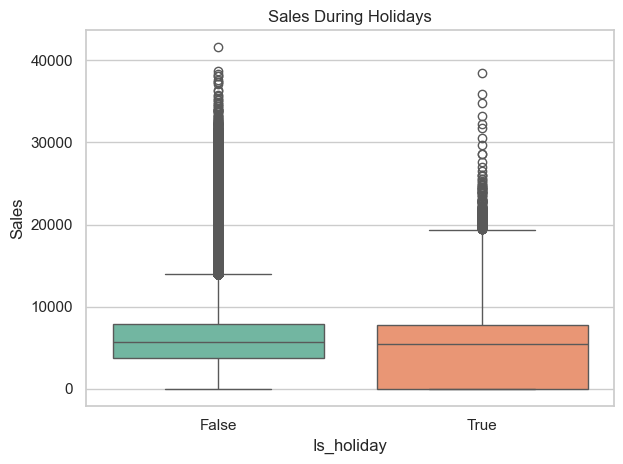

In [54]:
plot_sales_analysis(data=merged_data, analysis_type='holiday_effect', detailed=True)

2025-01-06 04:20:38 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-06 04:20:38 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-06 04:20:38 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-06 04:20:38 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
c:\Users\Darkles\10academy\10Academy-Kifiya-Week-4\notebooks\..\scripts\utils\visualizations.py:293: FutureWarning: 

Passin

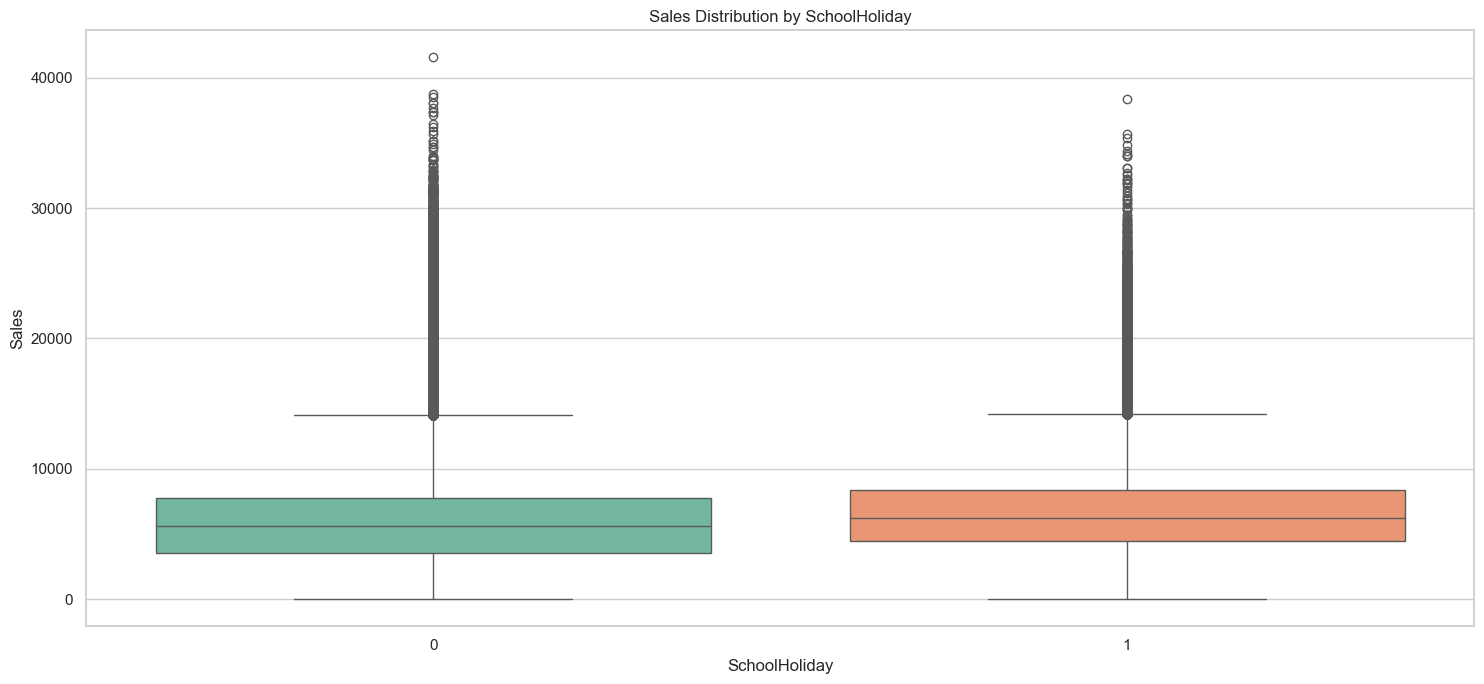

In [55]:
plot_sales_during_holidays(merged_data, "SchoolHoliday", "Sales")

c:\Users\Darkles\10academy\10Academy-Kifiya-Week-4\notebooks\..\scripts\utils\visualizations.py:293: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  aggregated_sales = data[column_name].resample(freq).sum()


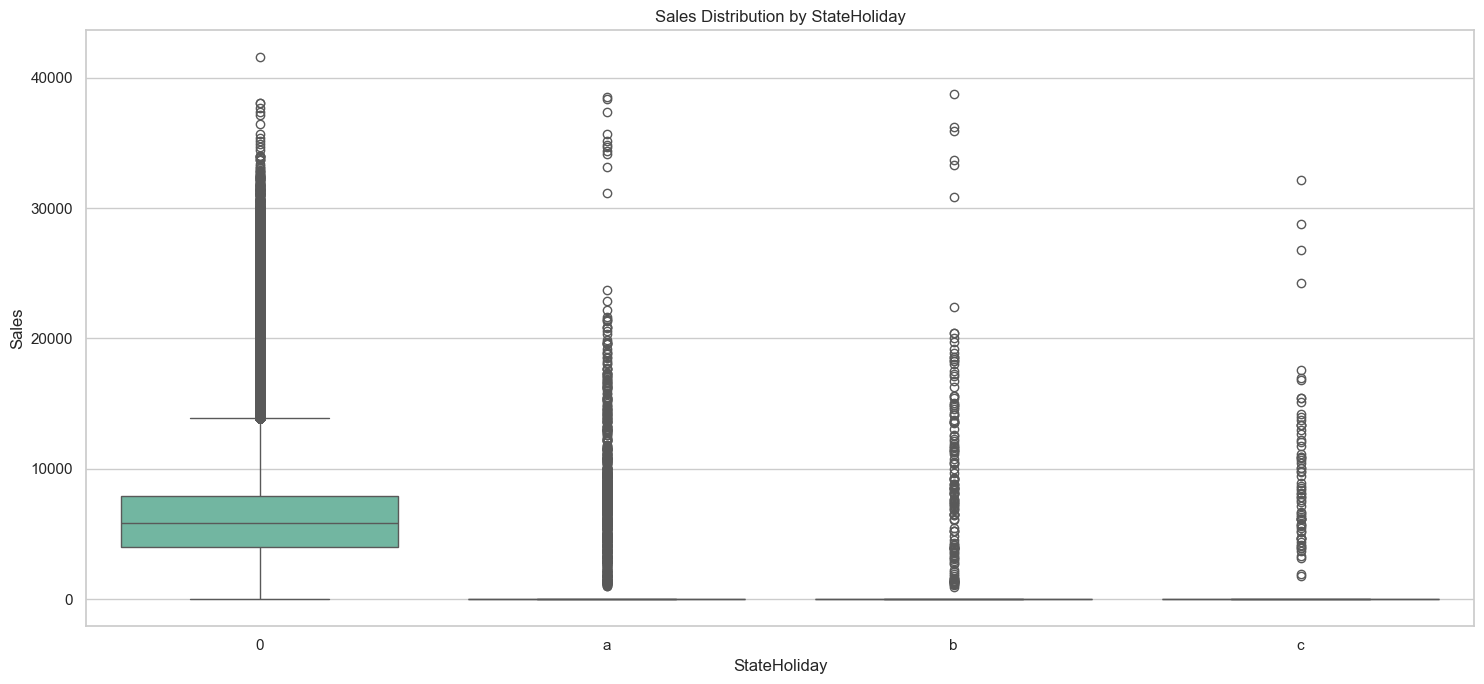

In [56]:
plot_sales_during_holidays(merged_data, "StateHoliday", "Sales")

Promotions and Holidays

2025-01-06 04:20:48 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-06 04:20:48 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-06 04:20:48 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-06 04:20:48 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
c:\Users\Darkles\10academy\10Academy-Kifiya-Week-4\notebooks\..\scripts\utils\visualizations.py:121: FutureWarning: 

Passin

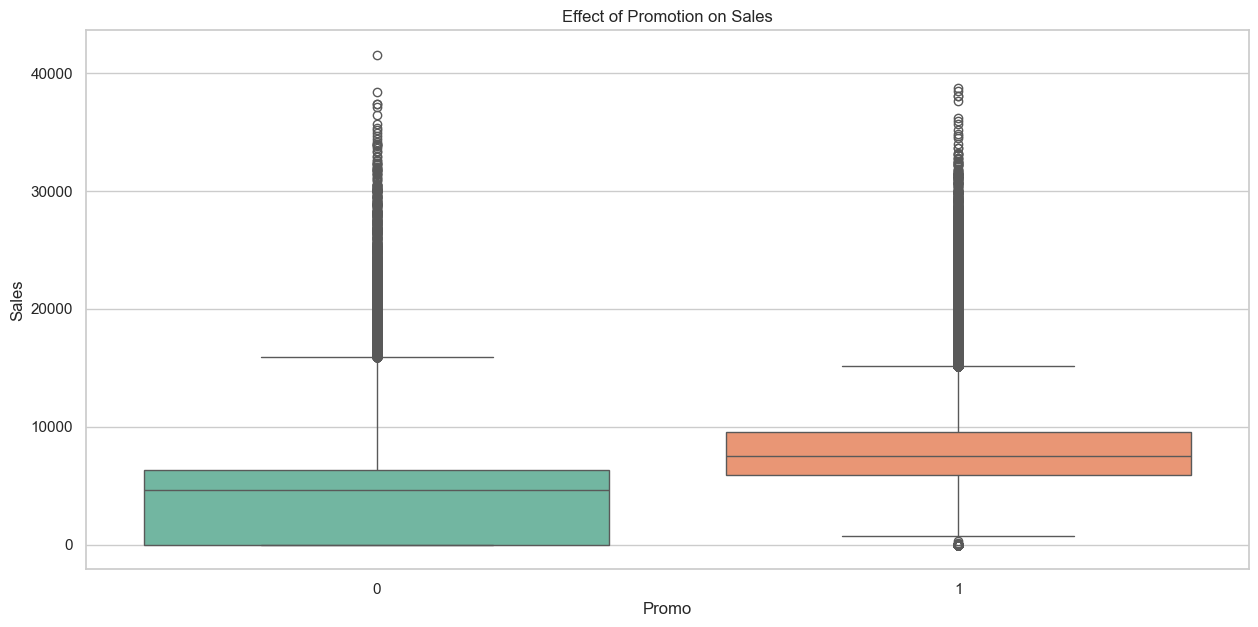

In [57]:
plot_event_effect(data=merged_data, event_column='Promo', effect_type='promotion')


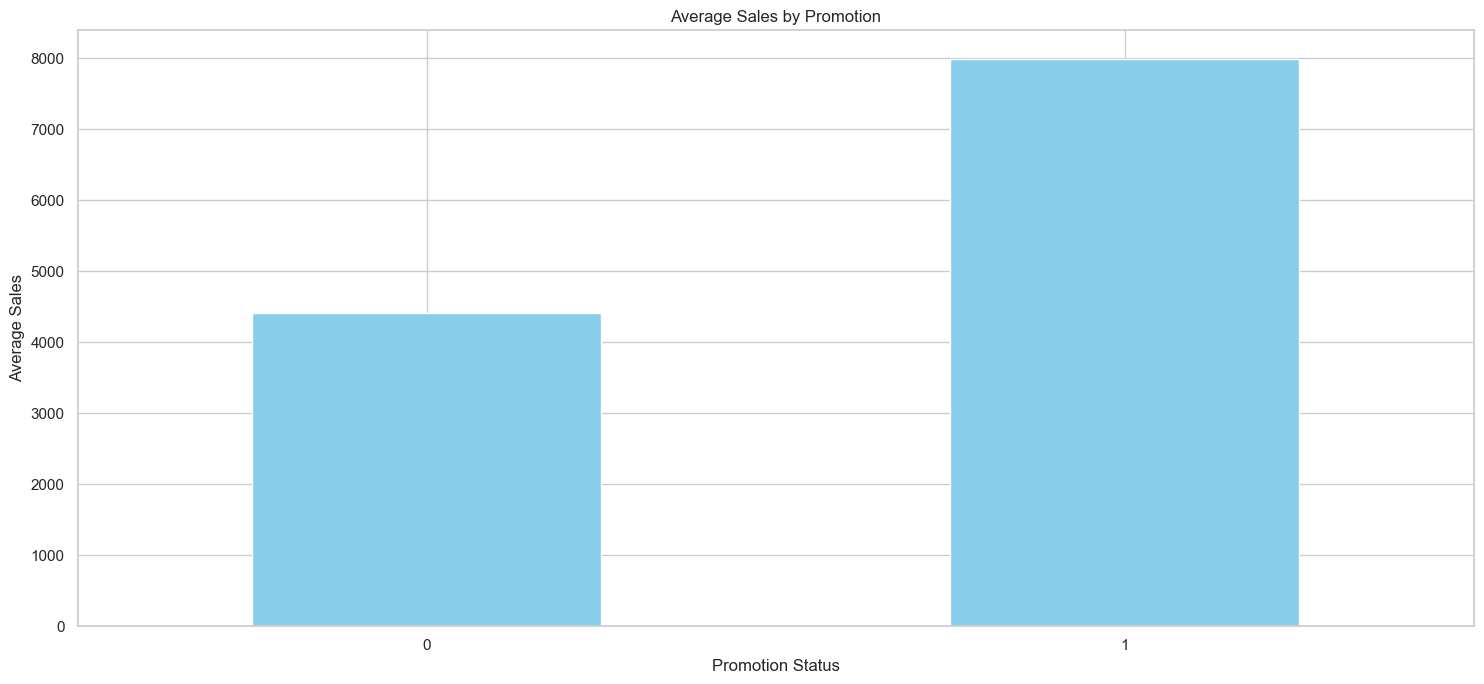

In [58]:
# Promotion Effect
plot_promotion_effect(merged_data)

2025-01-06 04:33:56 - INFO - Plotting promotion effect 2...
2025-01-06 04:33:56 - INFO - Plotting promotion effect 2...
2025-01-06 04:33:56 - INFO - Plotting promotion effect 2...
2025-01-06 04:33:56 - INFO - Plotting promotion effect 2...
2025-01-06 04:33:56 - INFO - Plotting promotion effect 2...
2025-01-06 04:33:56 - INFO - Plotting promotion effect 2...
2025-01-06 04:33:56 - INFO - Plotting promotion effect 2...


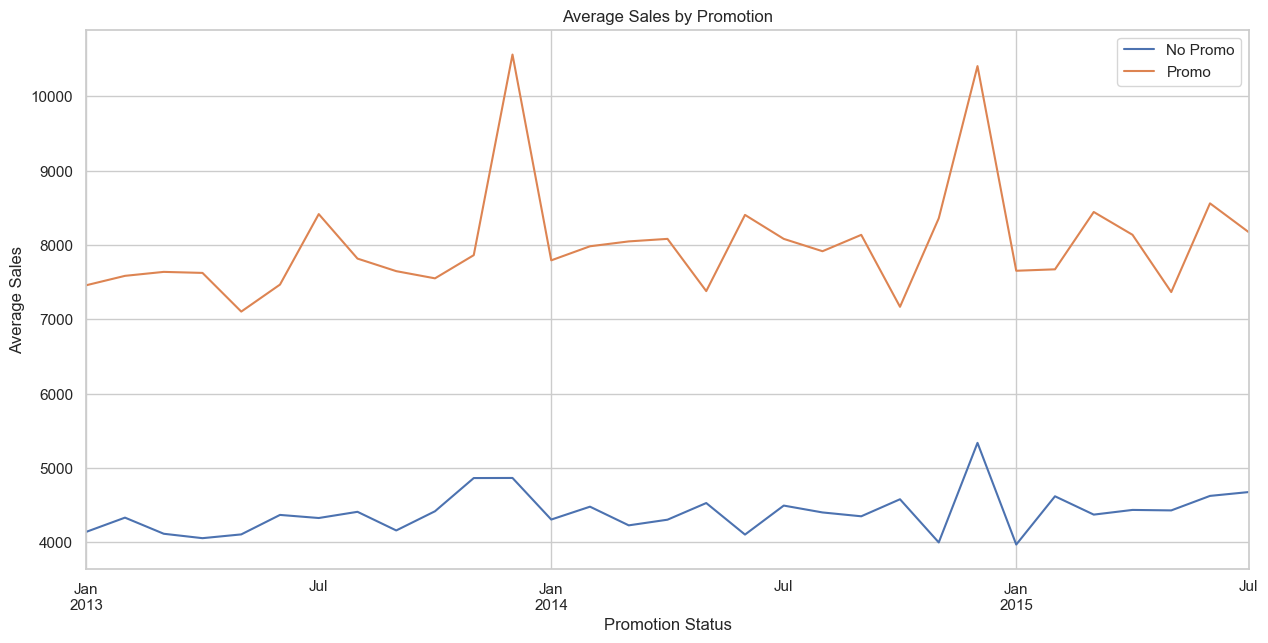

In [61]:
plot_promotion_effect_2(merged_data)

2025-01-06 04:34:10 - INFO - Plotting event effect...
2025-01-06 04:34:10 - INFO - Plotting event effect...
2025-01-06 04:34:10 - INFO - Plotting event effect...
2025-01-06 04:34:10 - INFO - Plotting event effect...
2025-01-06 04:34:10 - INFO - Plotting event effect...
2025-01-06 04:34:10 - INFO - Plotting event effect...
2025-01-06 04:34:10 - INFO - Plotting event effect...
2025-01-06 04:34:10 - INFO - Starting to generate holiday data for ET...
2025-01-06 04:34:10 - INFO - Starting to generate holiday data for ET...
2025-01-06 04:34:10 - INFO - Starting to generate holiday data for ET...
2025-01-06 04:34:10 - INFO - Starting to generate holiday data for ET...
2025-01-06 04:34:10 - INFO - Starting to generate holiday data for ET...
2025-01-06 04:34:10 - INFO - Starting to generate holiday data for ET...
2025-01-06 04:34:10 - INFO - Starting to generate holiday data for ET...
2025-01-06 04:38:30 - INFO - Holiday data generated successfully.
2025-01-06 04:38:30 - INFO - Holiday data gen

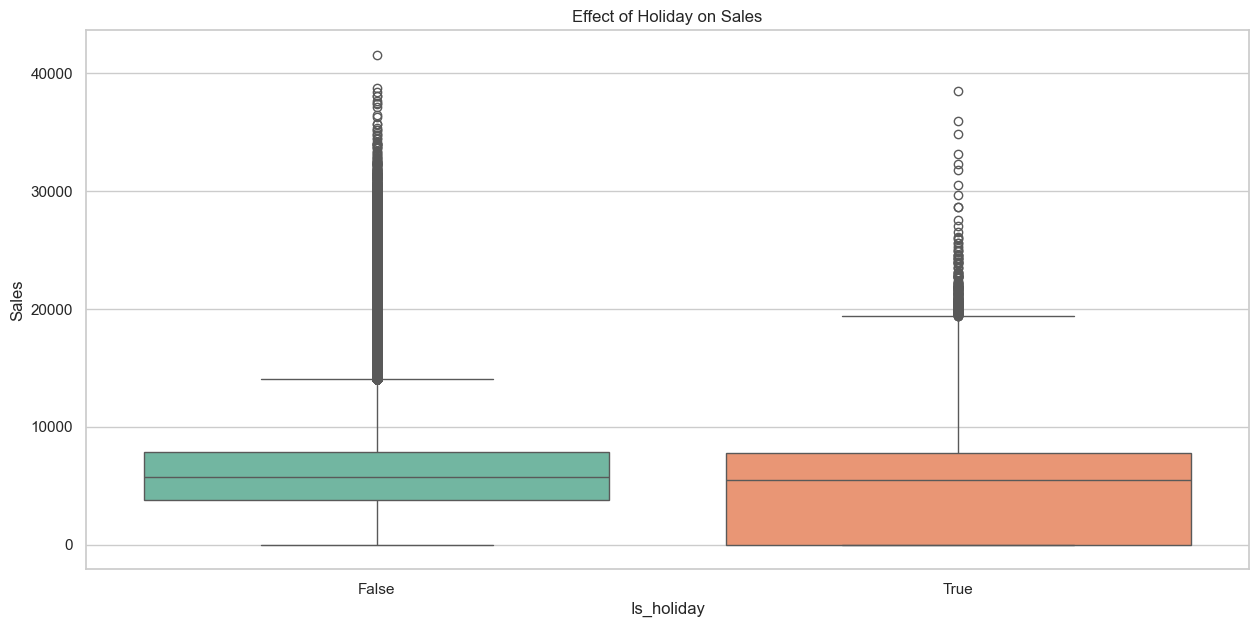

In [62]:
plot_event_effect(data=merged_data, event_column='IsHoliday', effect_type='holiday')

2025-01-06 04:38:35 - INFO - Plotting holiday effect...
2025-01-06 04:38:35 - INFO - Plotting holiday effect...
2025-01-06 04:38:35 - INFO - Plotting holiday effect...
2025-01-06 04:38:35 - INFO - Plotting holiday effect...
2025-01-06 04:38:35 - INFO - Plotting holiday effect...
2025-01-06 04:38:35 - INFO - Plotting holiday effect...
2025-01-06 04:38:35 - INFO - Plotting holiday effect...
2025-01-06 04:38:35 - INFO - Plotting holiday effect...
2025-01-06 04:38:36 - INFO - Starting to generate holiday data for ET...
2025-01-06 04:38:36 - INFO - Starting to generate holiday data for ET...
2025-01-06 04:38:36 - INFO - Starting to generate holiday data for ET...
2025-01-06 04:38:36 - INFO - Starting to generate holiday data for ET...
2025-01-06 04:38:36 - INFO - Starting to generate holiday data for ET...
2025-01-06 04:38:36 - INFO - Starting to generate holiday data for ET...
2025-01-06 04:38:36 - INFO - Starting to generate holiday data for ET...
2025-01-06 04:38:36 - INFO - Starting to 

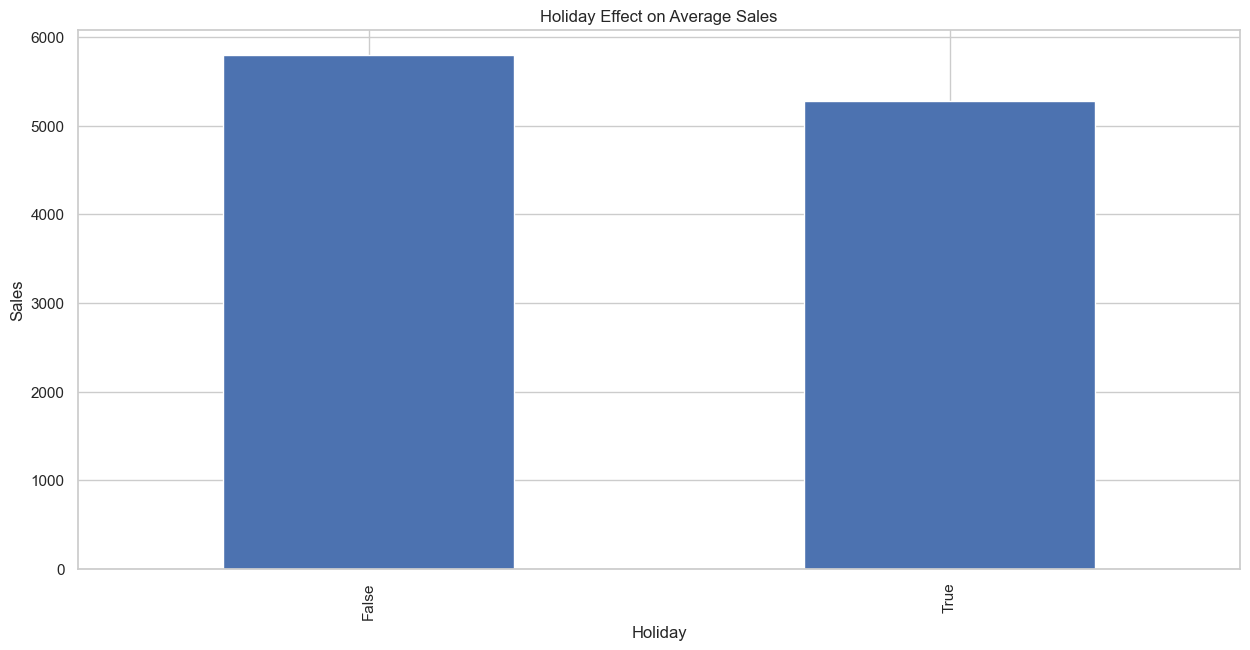

In [63]:
# Holiday Effect
plot_holiday_effect(merged_data)

 Rolling Statistics and Decomposition

2025-01-06 04:42:44 - INFO - Performing time series analysis...
2025-01-06 04:42:44 - INFO - Performing time series analysis...
2025-01-06 04:42:44 - INFO - Performing time series analysis...
2025-01-06 04:42:44 - INFO - Performing time series analysis...
2025-01-06 04:42:44 - INFO - Performing time series analysis...
2025-01-06 04:42:44 - INFO - Performing time series analysis...
2025-01-06 04:42:44 - INFO - Performing time series analysis...
2025-01-06 04:42:44 - INFO - Performing time series analysis...
2025-01-06 04:42:44 - INFO - Performing time series analysis...


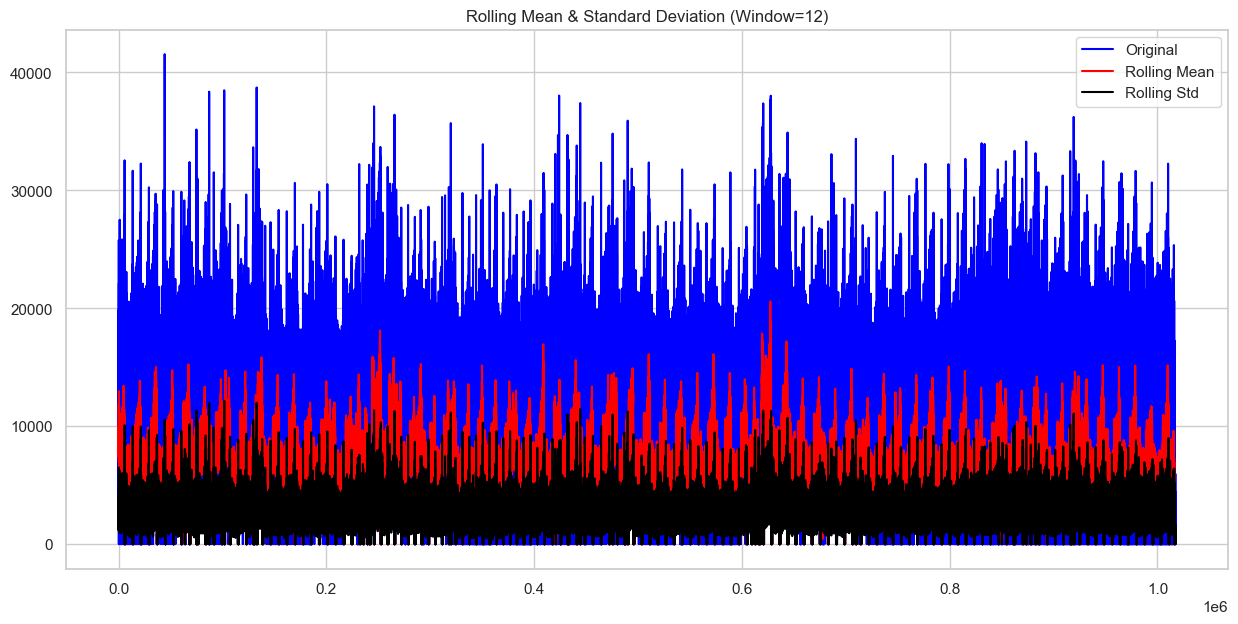

In [64]:
plot_time_series_analysis(data=merged_data, column='Sales', analysis_type='rolling', window=12)


2025-01-06 04:42:51 - INFO - Performing time series analysis...
2025-01-06 04:42:51 - INFO - Performing time series analysis...
2025-01-06 04:42:51 - INFO - Performing time series analysis...
2025-01-06 04:42:51 - INFO - Performing time series analysis...
2025-01-06 04:42:51 - INFO - Performing time series analysis...
2025-01-06 04:42:51 - INFO - Performing time series analysis...
2025-01-06 04:42:51 - INFO - Performing time series analysis...
2025-01-06 04:42:51 - INFO - Performing time series analysis...
2025-01-06 04:42:51 - INFO - Performing time series analysis...


<Figure size 2500x1500 with 0 Axes>

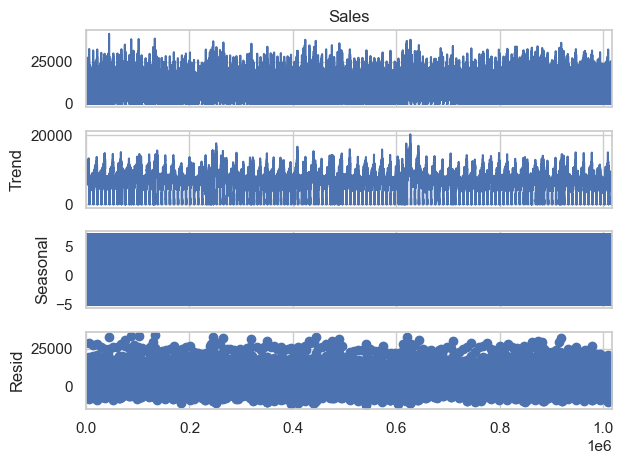

In [65]:
plot_time_series_analysis(data=merged_data, column='Sales', analysis_type='decomposition', model='additive')


Sales Trends

2025-01-06 04:43:44 - INFO - Plotting sales trend during holidays...
2025-01-06 04:43:44 - INFO - Plotting sales trend during holidays...
2025-01-06 04:43:44 - INFO - Plotting sales trend during holidays...
2025-01-06 04:43:44 - INFO - Plotting sales trend during holidays...
2025-01-06 04:43:44 - INFO - Plotting sales trend during holidays...
2025-01-06 04:43:44 - INFO - Plotting sales trend during holidays...
2025-01-06 04:43:44 - INFO - Plotting sales trend during holidays...
2025-01-06 04:43:44 - INFO - Plotting sales trend during holidays...
2025-01-06 04:43:44 - INFO - Plotting sales trend during holidays...
c:\Users\Darkles\10academy\10Academy-Kifiya-Week-4\notebooks\..\scripts\utils\visualizations.py:522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

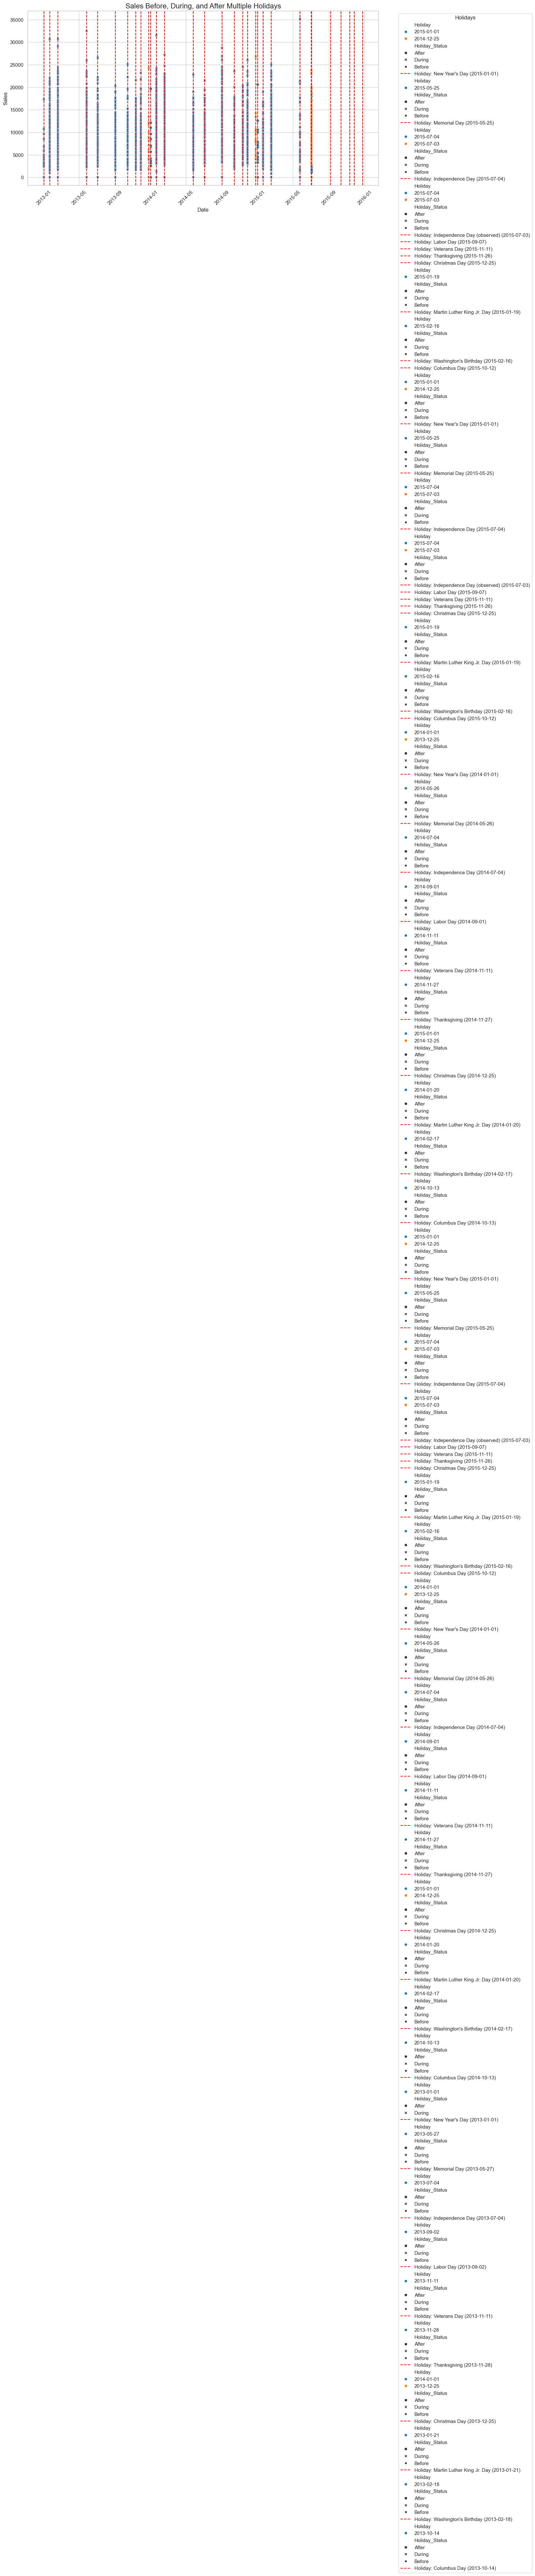

In [67]:
# Call the function with no specific holidays
plot_sales_trend_holidays(merged_data)


2025-01-06 04:47:27 - INFO - Plotting sales trend during holidays...
2025-01-06 04:47:27 - INFO - Plotting sales trend during holidays...
2025-01-06 04:47:27 - INFO - Plotting sales trend during holidays...
2025-01-06 04:47:27 - INFO - Plotting sales trend during holidays...
2025-01-06 04:47:27 - INFO - Plotting sales trend during holidays...
2025-01-06 04:47:27 - INFO - Plotting sales trend during holidays...
2025-01-06 04:47:27 - INFO - Plotting sales trend during holidays...
2025-01-06 04:47:27 - INFO - Plotting sales trend during holidays...
2025-01-06 04:47:27 - INFO - Plotting sales trend during holidays...
2025-01-06 04:47:27 - INFO - Plotting sales trend during holidays...
c:\Users\Darkles\10academy\10Academy-Kifiya-Week-4\notebooks\..\scripts\utils\visualizations.py:522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

c:\Users\Darkles\10academy\10Academy-Kifiya-Week-4\notebooks\..\scripts\utils\visualizations.py:522: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\Darkles\10academy\10Academy-Kifiya-Week-4\notebooks\..\scripts\utils\visualizations.py:527: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sns.scatterplot(data=filtered_data, x=date_column, y=sales_column, hue='Holiday', style='Holiday_Status', palette='tab10')


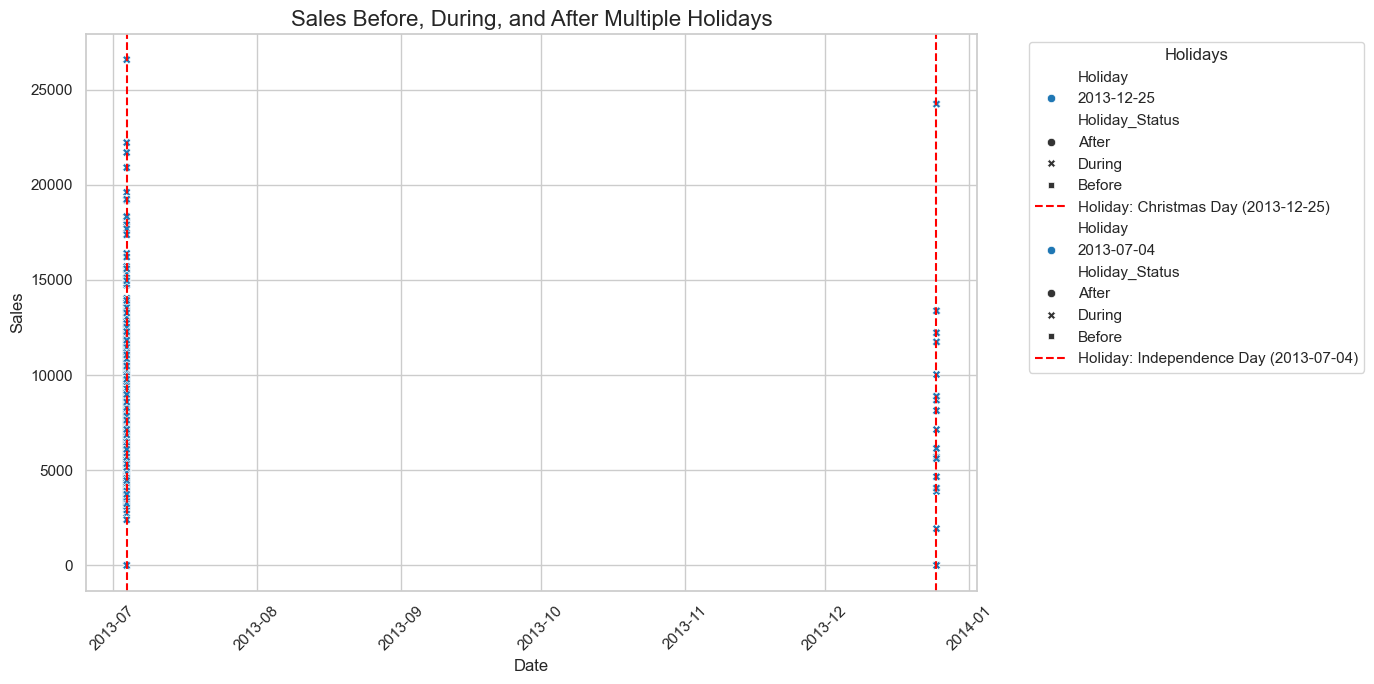

In [68]:
# Call the function with specific holidays
plot_sales_trend_holidays(merged_data, holiday_dates=['2013-12-25', '2013-11-24', '2013-07-04']) 

2025-01-06 04:47:29 - INFO - Plotting sales on holidays...
2025-01-06 04:47:29 - INFO - Plotting sales on holidays...
2025-01-06 04:47:29 - INFO - Plotting sales on holidays...
2025-01-06 04:47:29 - INFO - Plotting sales on holidays...
2025-01-06 04:47:29 - INFO - Plotting sales on holidays...
2025-01-06 04:47:29 - INFO - Plotting sales on holidays...
2025-01-06 04:47:29 - INFO - Plotting sales on holidays...
2025-01-06 04:47:29 - INFO - Plotting sales on holidays...
2025-01-06 04:47:29 - INFO - Plotting sales on holidays...
2025-01-06 04:47:29 - INFO - Plotting sales on holidays...


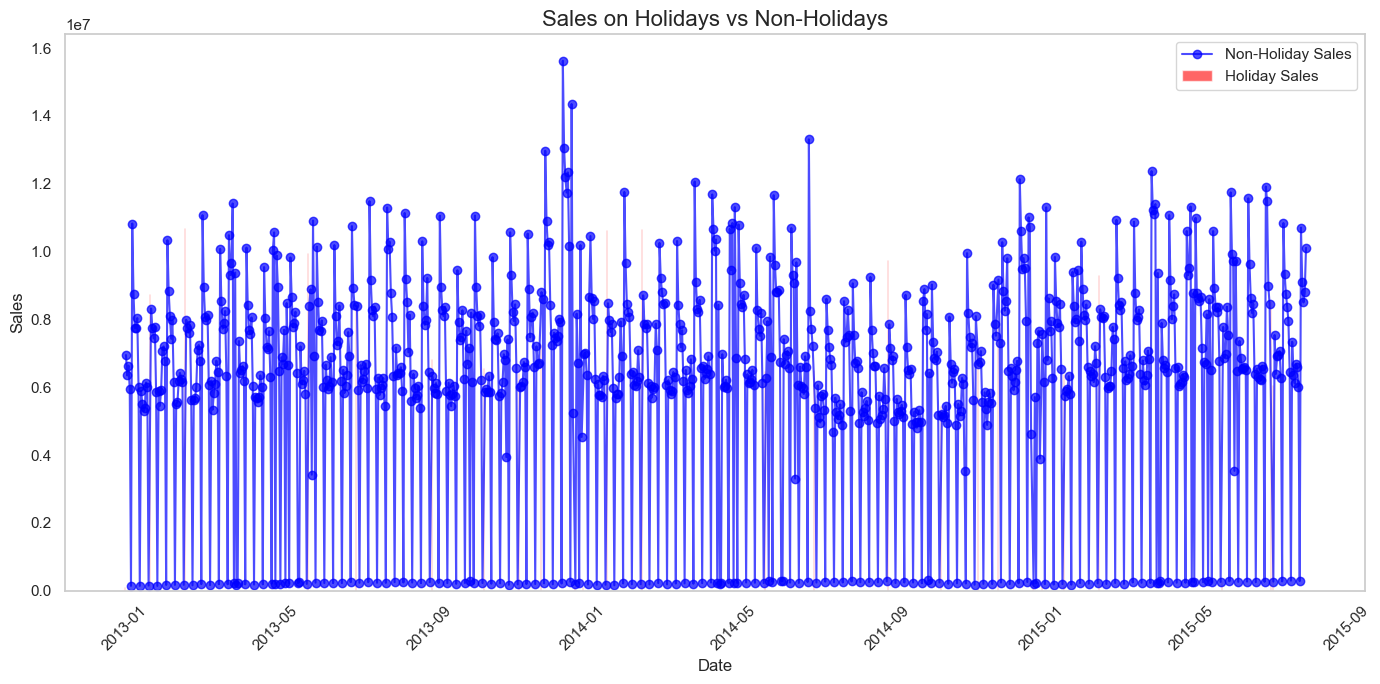

In [69]:
plot_sales_holidays(merged_data)

2025-01-06 04:47:34 - INFO - Plotting sales by holiday...
2025-01-06 04:47:34 - INFO - Plotting sales by holiday...
2025-01-06 04:47:34 - INFO - Plotting sales by holiday...
2025-01-06 04:47:34 - INFO - Plotting sales by holiday...
2025-01-06 04:47:34 - INFO - Plotting sales by holiday...
2025-01-06 04:47:34 - INFO - Plotting sales by holiday...
2025-01-06 04:47:34 - INFO - Plotting sales by holiday...
2025-01-06 04:47:34 - INFO - Plotting sales by holiday...
2025-01-06 04:47:34 - INFO - Plotting sales by holiday...
2025-01-06 04:47:34 - INFO - Plotting sales by holiday...
C:\Users\Darkles\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


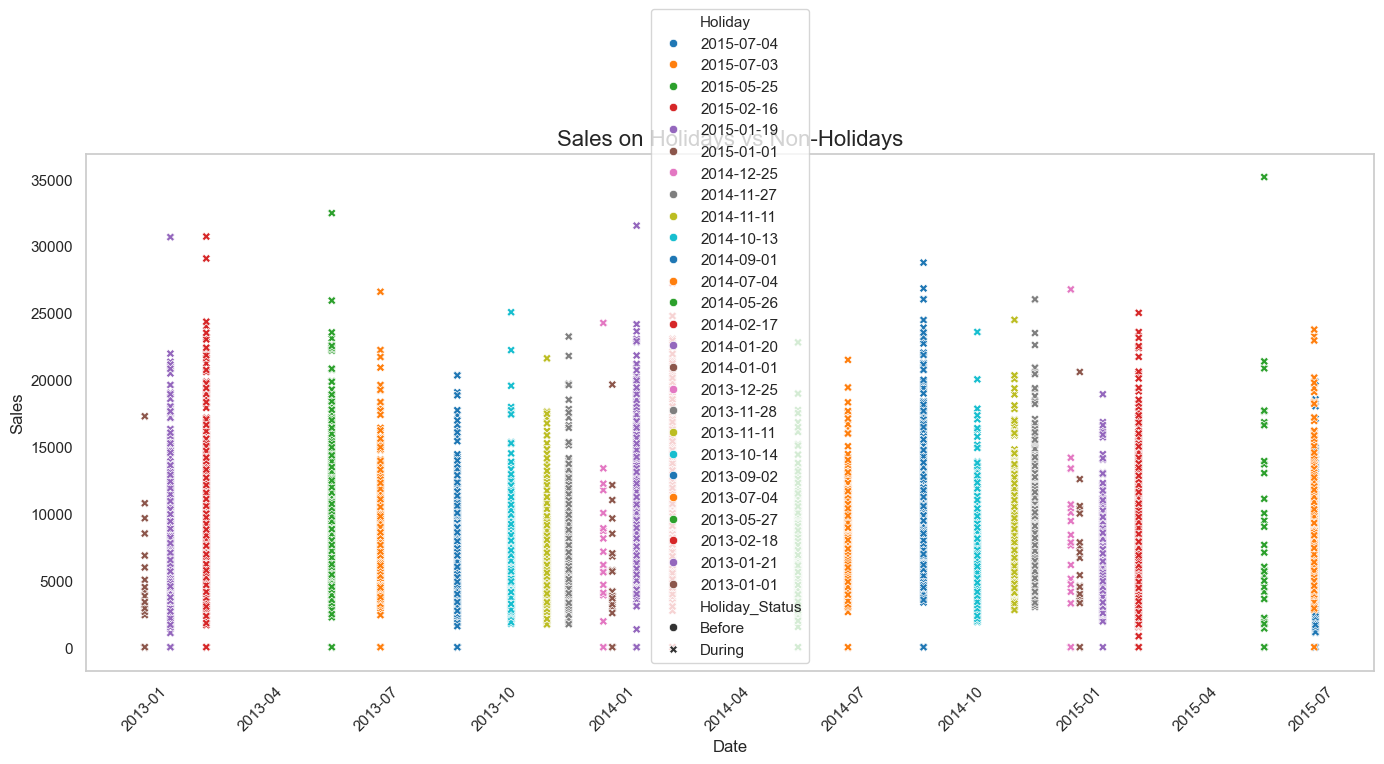

In [70]:
plot_sales_by_holiday(merged_data)  

2025-01-06 04:52:27 - INFO - Plotting sales before, during, and after holidays...
2025-01-06 04:52:27 - INFO - Plotting sales before, during, and after holidays...
2025-01-06 04:52:27 - INFO - Plotting sales before, during, and after holidays...
2025-01-06 04:52:27 - INFO - Plotting sales before, during, and after holidays...
2025-01-06 04:52:27 - INFO - Plotting sales before, during, and after holidays...
2025-01-06 04:52:27 - INFO - Plotting sales before, during, and after holidays...
2025-01-06 04:52:27 - INFO - Plotting sales before, during, and after holidays...
2025-01-06 04:52:27 - INFO - Plotting sales before, during, and after holidays...
2025-01-06 04:52:27 - INFO - Plotting sales before, during, and after holidays...
2025-01-06 04:52:27 - INFO - Plotting sales before, during, and after holidays...
2025-01-06 04:52:27 - INFO - Plotting sales before, during, and after holidays...
2025-01-06 04:52:27 - INFO - Plotting sales before, during, and after holidays...


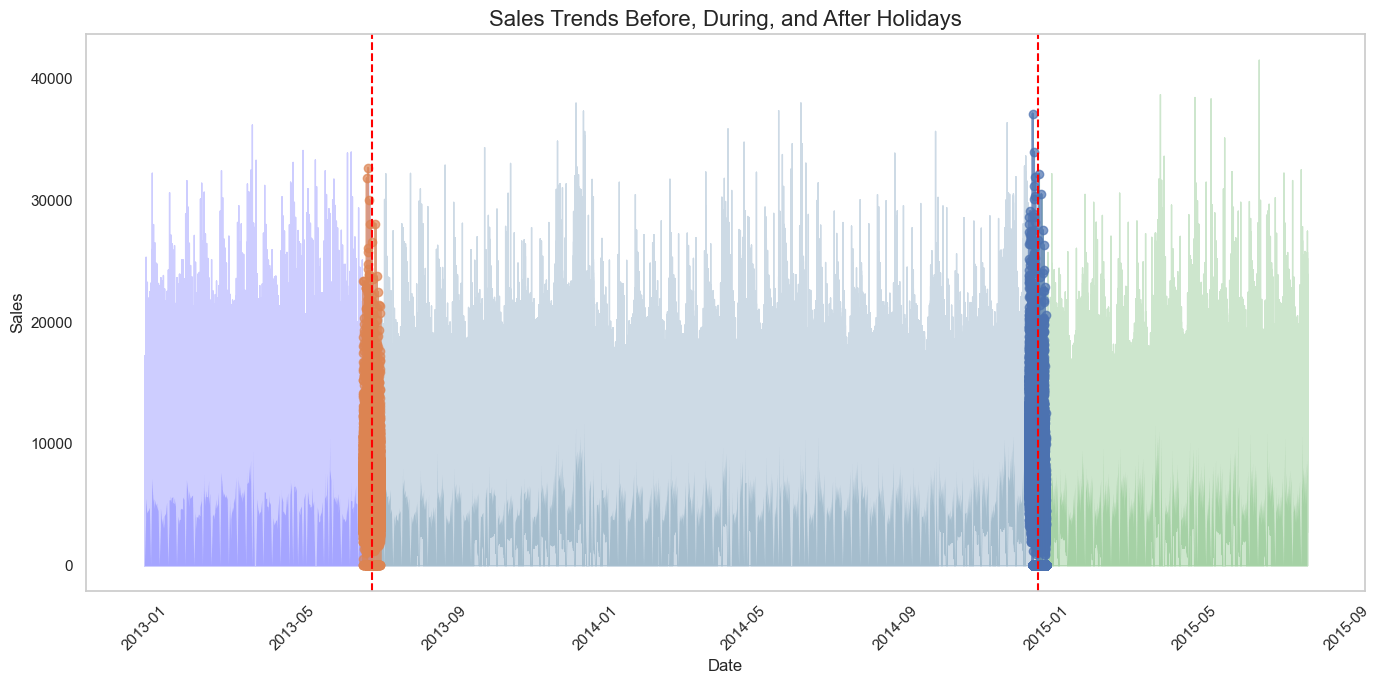

In [71]:
plot_sales_before_during_after_holidays(merged_data, ['2014-12-25', '2013-07-04'])

In [4]:
# plot_sales_before_during_after_holidays(merged_data)

Competition Analysis

2025-01-06 05:13:48 - INFO - Plotting sales vs competitor distance...
2025-01-06 05:13:48 - INFO - Plotting sales vs competitor distance...
2025-01-06 05:13:48 - INFO - Plotting sales vs competitor distance...
2025-01-06 05:13:48 - INFO - Plotting sales vs competitor distance...
2025-01-06 05:13:48 - INFO - Plotting sales vs competitor distance...
2025-01-06 05:13:48 - INFO - Plotting sales vs competitor distance...
2025-01-06 05:13:48 - INFO - Plotting sales vs competitor distance...
2025-01-06 05:13:48 - INFO - Plotting sales vs competitor distance...
2025-01-06 05:13:48 - INFO - Plotting sales vs competitor distance...
2025-01-06 05:13:48 - INFO - Plotting sales vs competitor distance...
2025-01-06 05:13:48 - INFO - Plotting sales vs competitor distance...
2025-01-06 05:13:48 - INFO - Plotting sales vs competitor distance...
2025-01-06 05:13:48 - INFO - Plotting sales vs competitor distance...


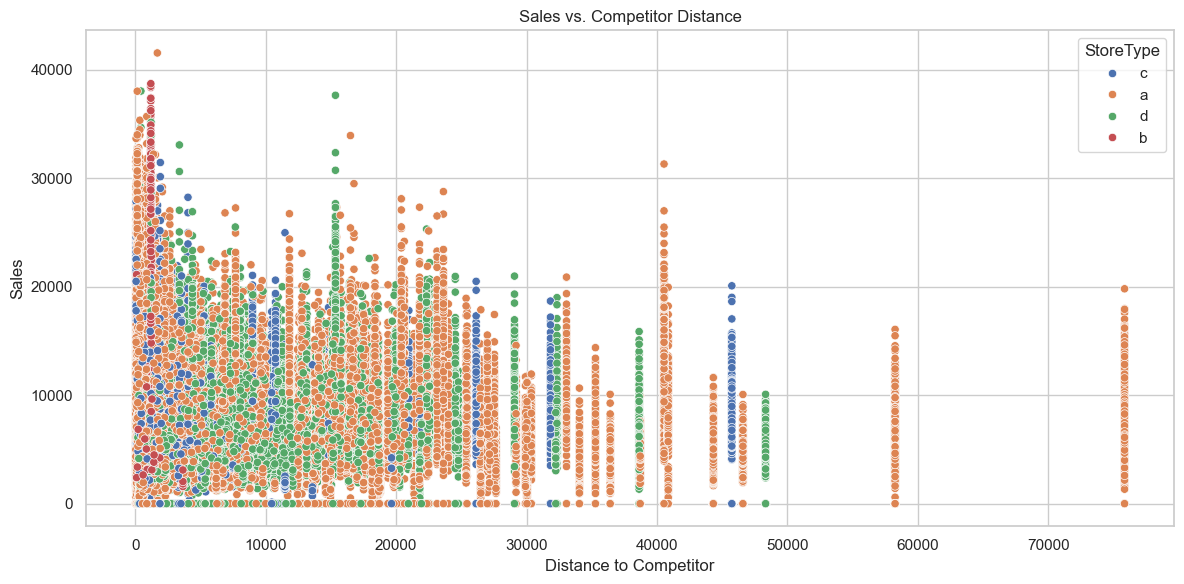

In [73]:
plot_sales_vs_competitor_distance(merged_data)

In [3]:
# plot_sales_around_competitor_openings(merged_data)

ACF and PACF

In [1]:
# plot_time_series_diagnostics(data=merged_data, column='Sales', diagnostics_type='ACF_PACF', lags=40)


In [2]:
# ACF and PACF
# plot_ACF_PACF(merged_data.set_index('Date'), 'Sales')

In [ ]:
# ACF and PACF
# plot_ACF_PACF_2(merged_data.set_index('Date'), 'Sales', title='Rolling Statistics of Sales', xlabel='Date', ylabel='Sales')